#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **check access to the GPU**

In [6]:
!nvidia-smi

Thu Feb  8 17:16:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics**

In [9]:
!pip install ultralytics==8.0.196

##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


#**Importing the Images Dataset**

In [12]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content/datasets’: File exists


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9w7P0Va8A0B61U05gQet")
project = rf.workspace("computer-vision-xiyu1").project("coral-life-forms-detection")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


#**Train the YOLOv8 Model on the Custom Dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/Coral-Life-Forms-Detection-3


In [19]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Coral-Life-Forms-Detection-3/data.yaml epochs=100 batch=16 imgsz=416

/content
100% 21.5M/21.5M [00:00<00:00, 337MB/s]
New https://pypi.org/project/ultralytics/8.1.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Coral-Life-Forms-Detection-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_str

In [20]:
from roboflow import Roboflow

rf = Roboflow(api_key="9w7P0Va8A0B61U05gQet")
project = rf.workspace("computer-vision-xiyu1").project("coral-life-forms-detection")
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/computer-vision-xiyu1/coral-life-forms-detection/3/uploadModel?api_key=9w7P0Va8A0B61U05gQet&modelType=yolov8&nocache=true


In [21]:
!ls {HOME}//runs/detect/train

args.yaml					   PR_curve.png		train_batch4500.jpg
confusion_matrix_normalized.png			   R_curve.png		train_batch4501.jpg
confusion_matrix.png				   results.csv		train_batch4502.jpg
events.out.tfevents.1707410533.a127ba37a073.818.0  results.png		val_batch0_labels.jpg
F1_curve.png					   roboflow_deploy.zip	val_batch0_pred.jpg
labels_correlogram.jpg				   state_dict.pt	val_batch1_labels.jpg
labels.jpg					   train_batch0.jpg	val_batch1_pred.jpg
model_artifacts.json				   train_batch1.jpg	weights
P_curve.png					   train_batch2.jpg


#**Displaying the Confusion Matrix**

/content


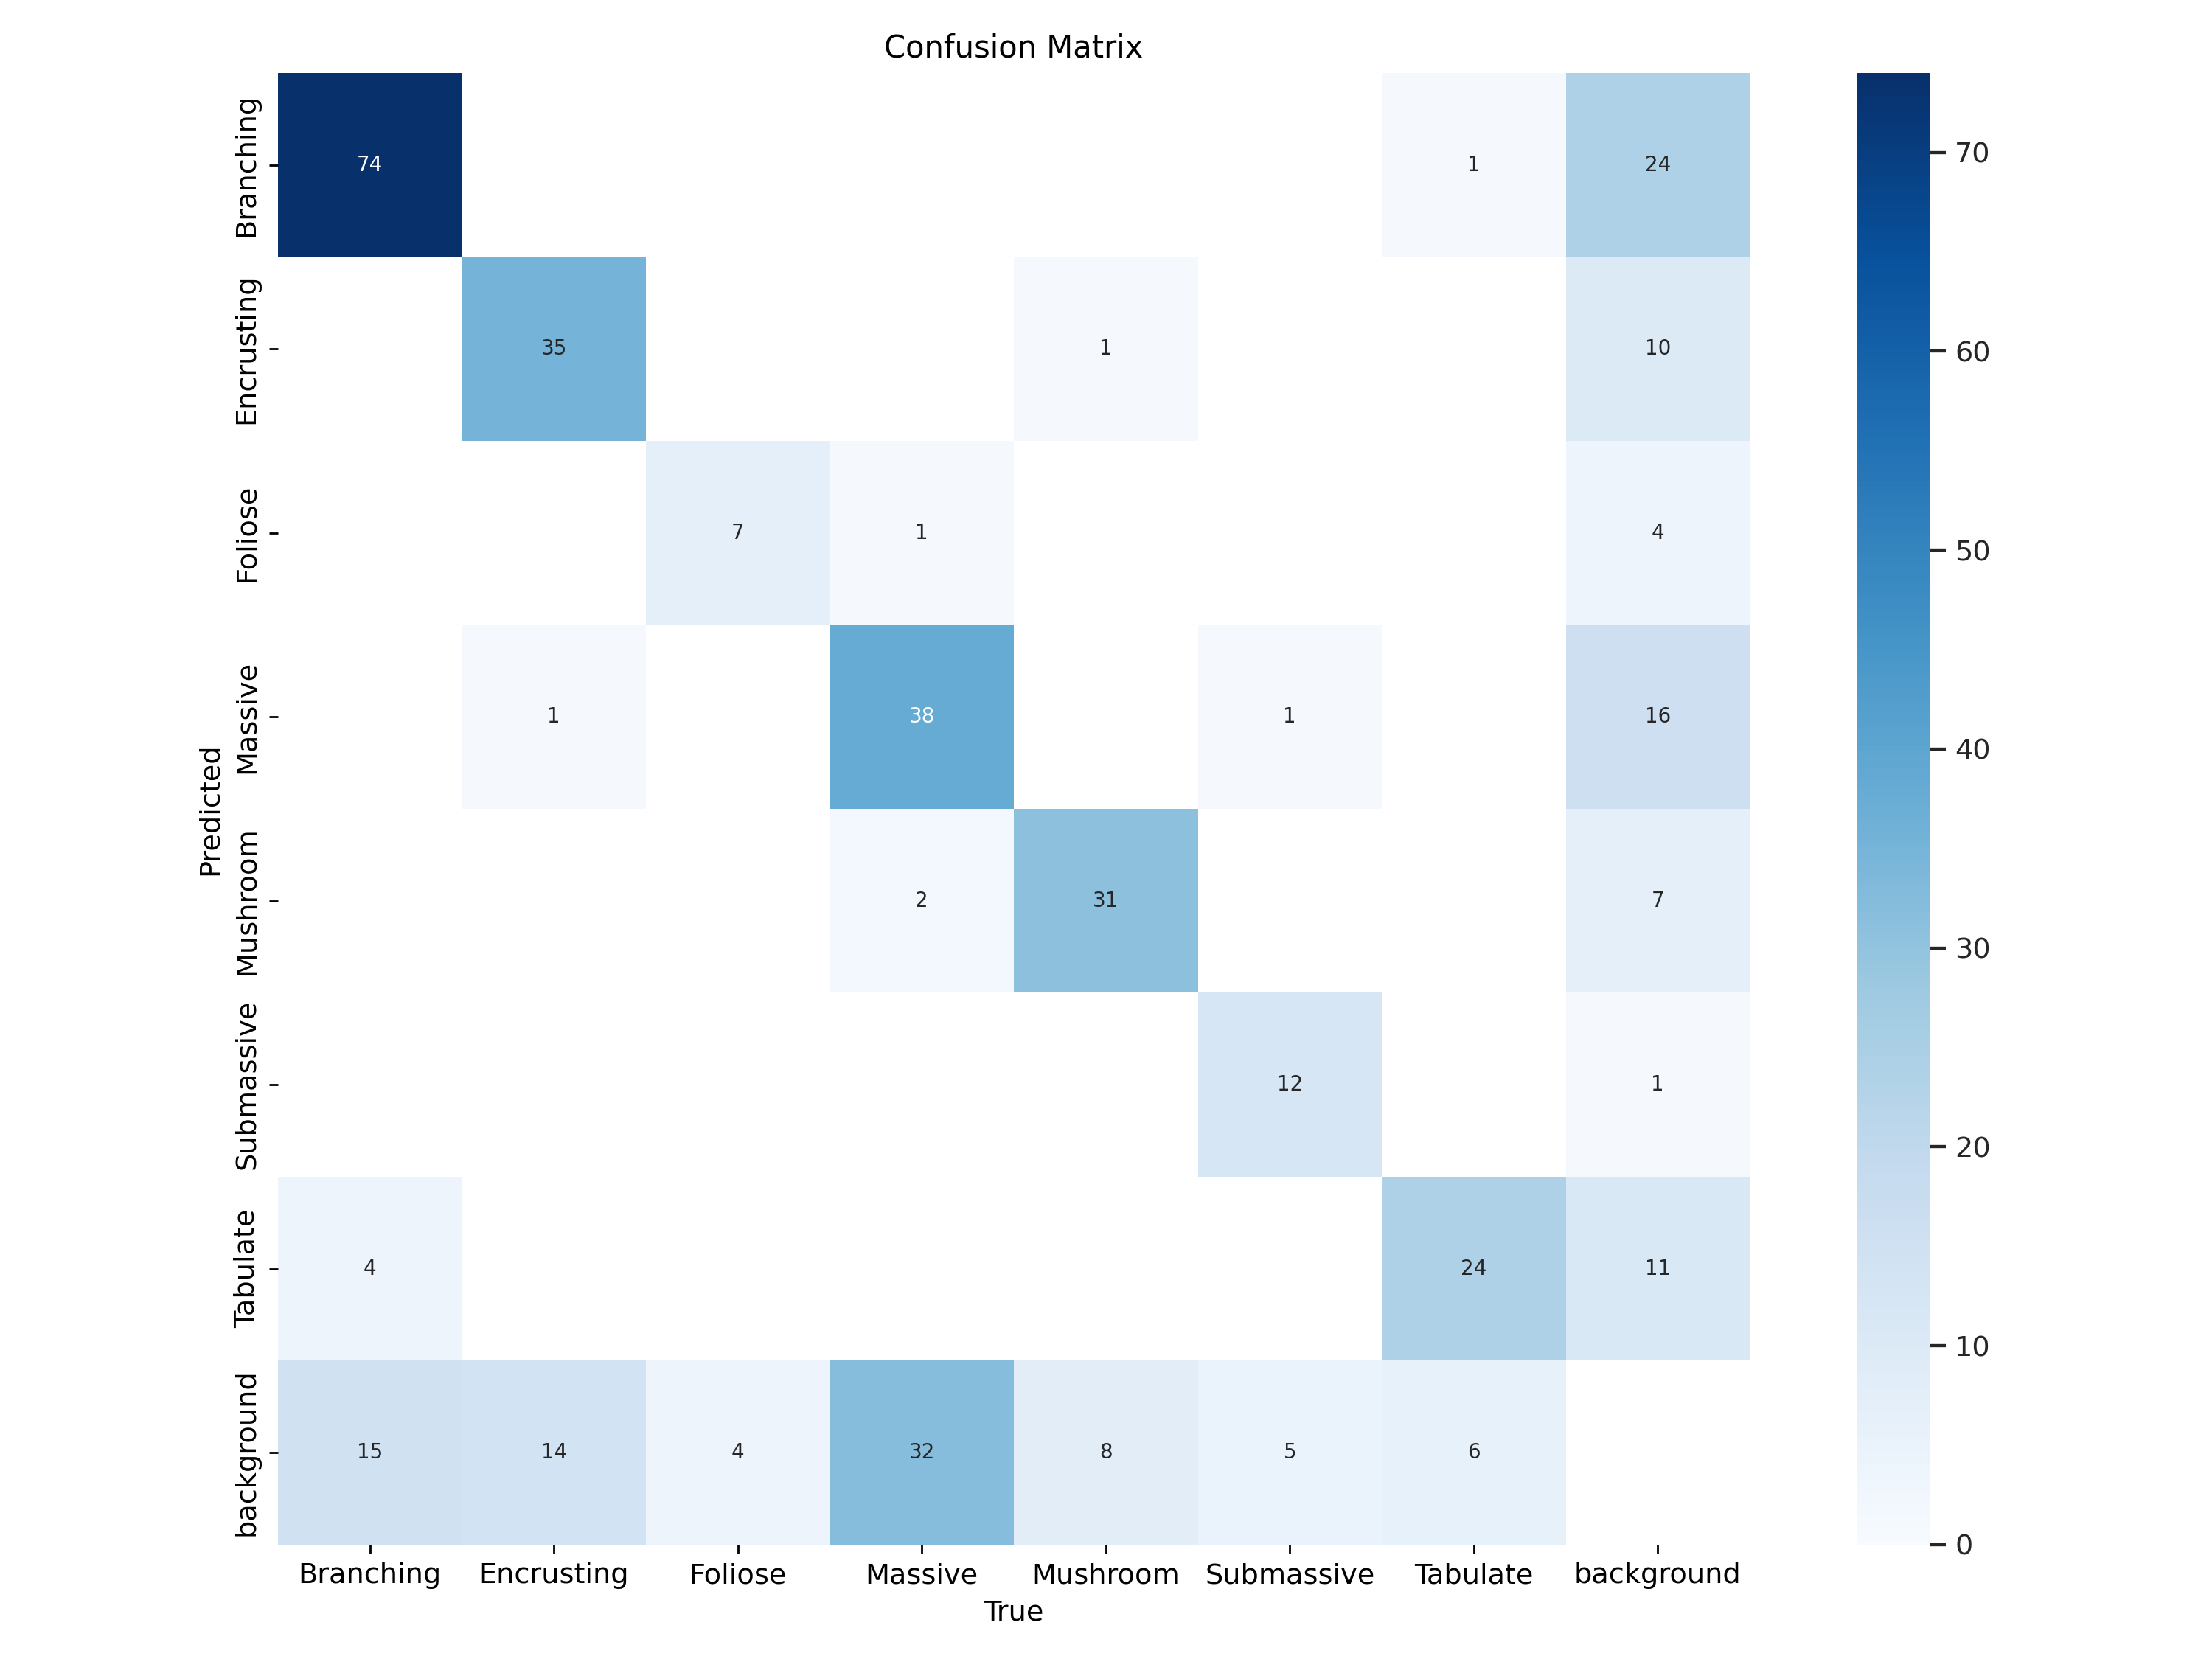

In [22]:
#Confusion matrix is the chart that shows how the model handles different classes
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

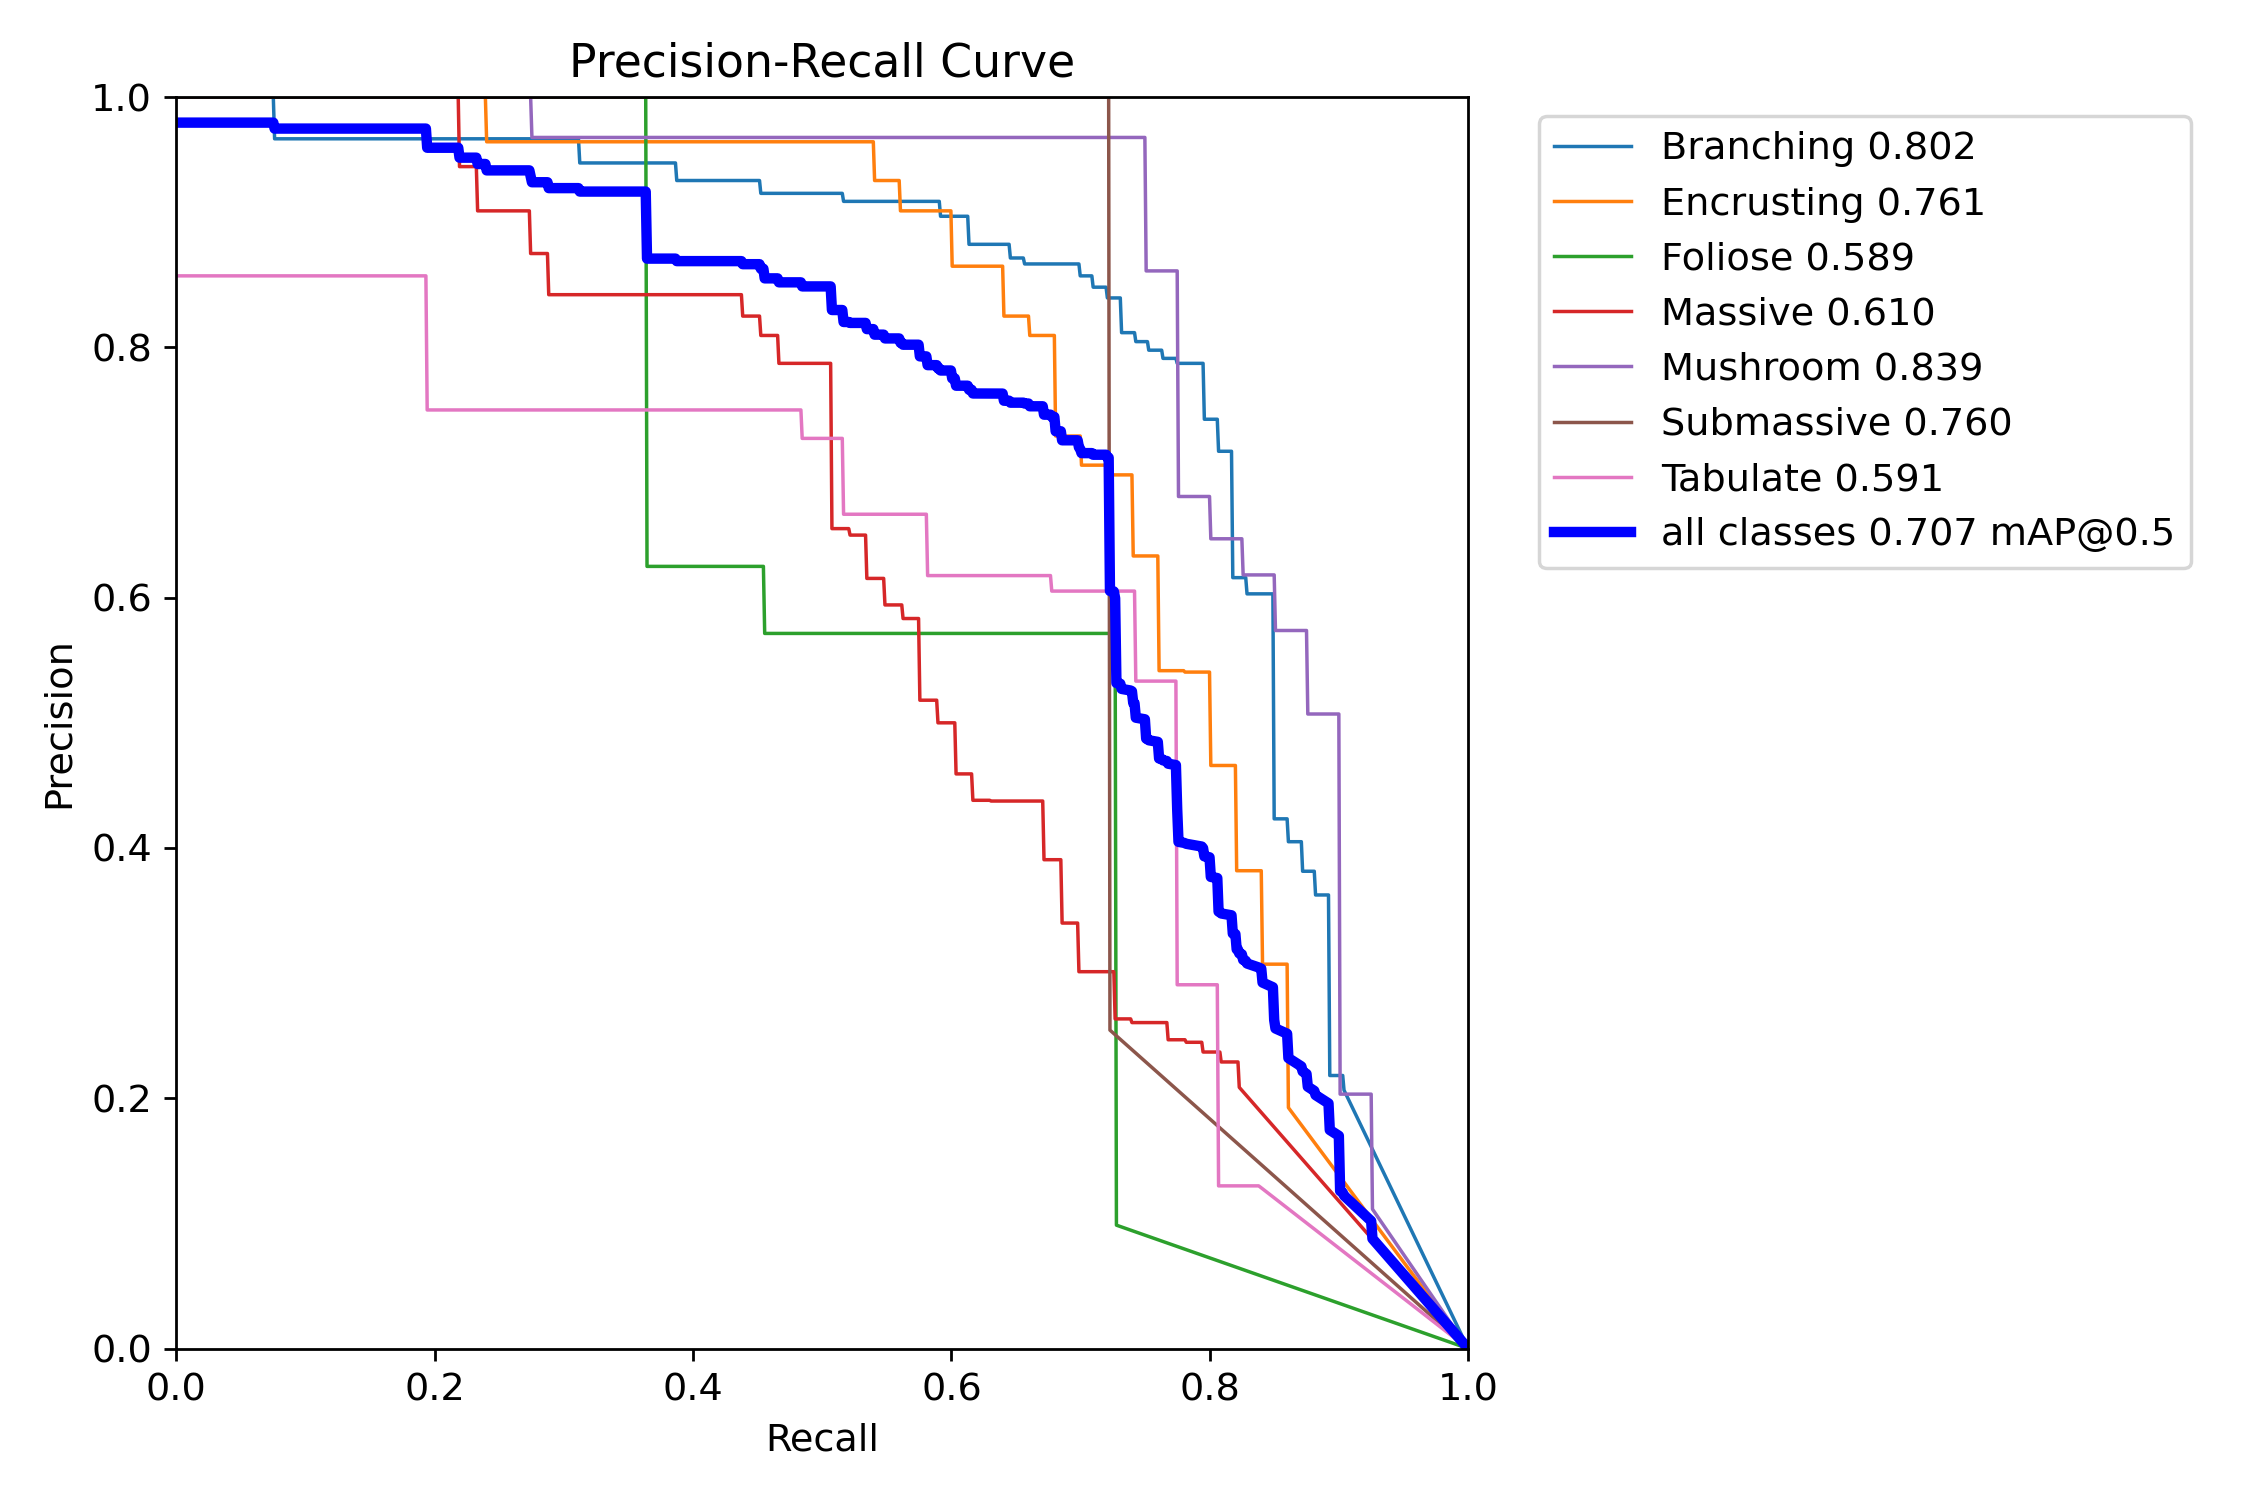

In [23]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

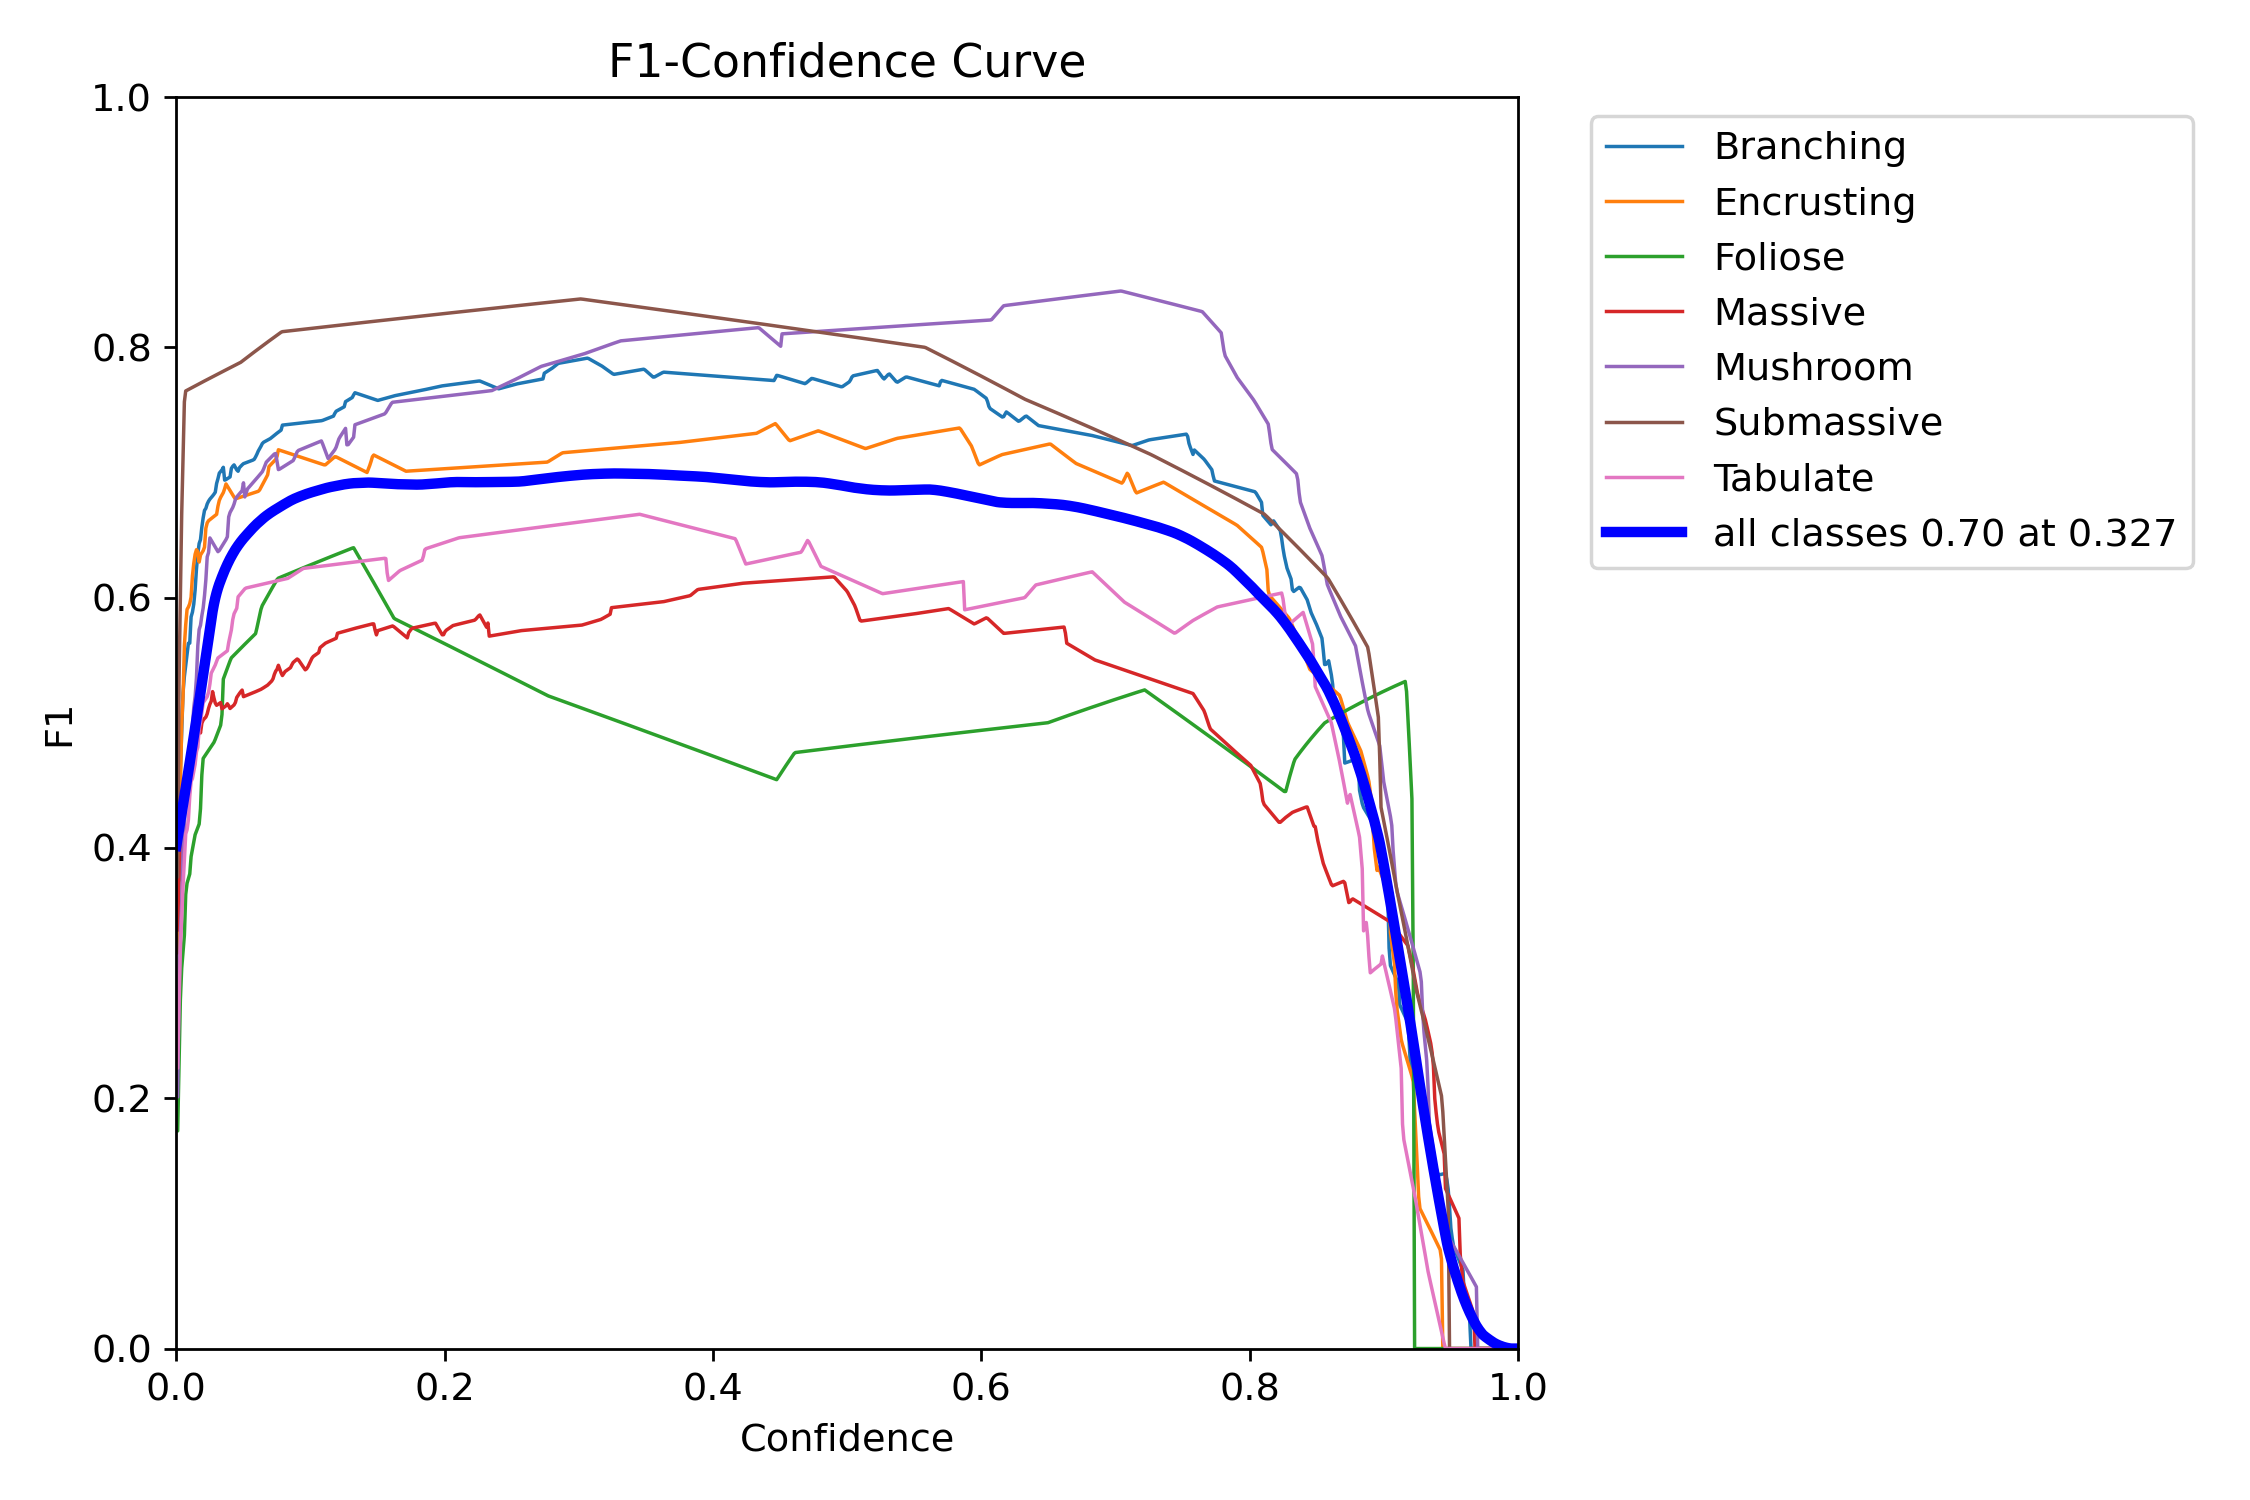

In [24]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

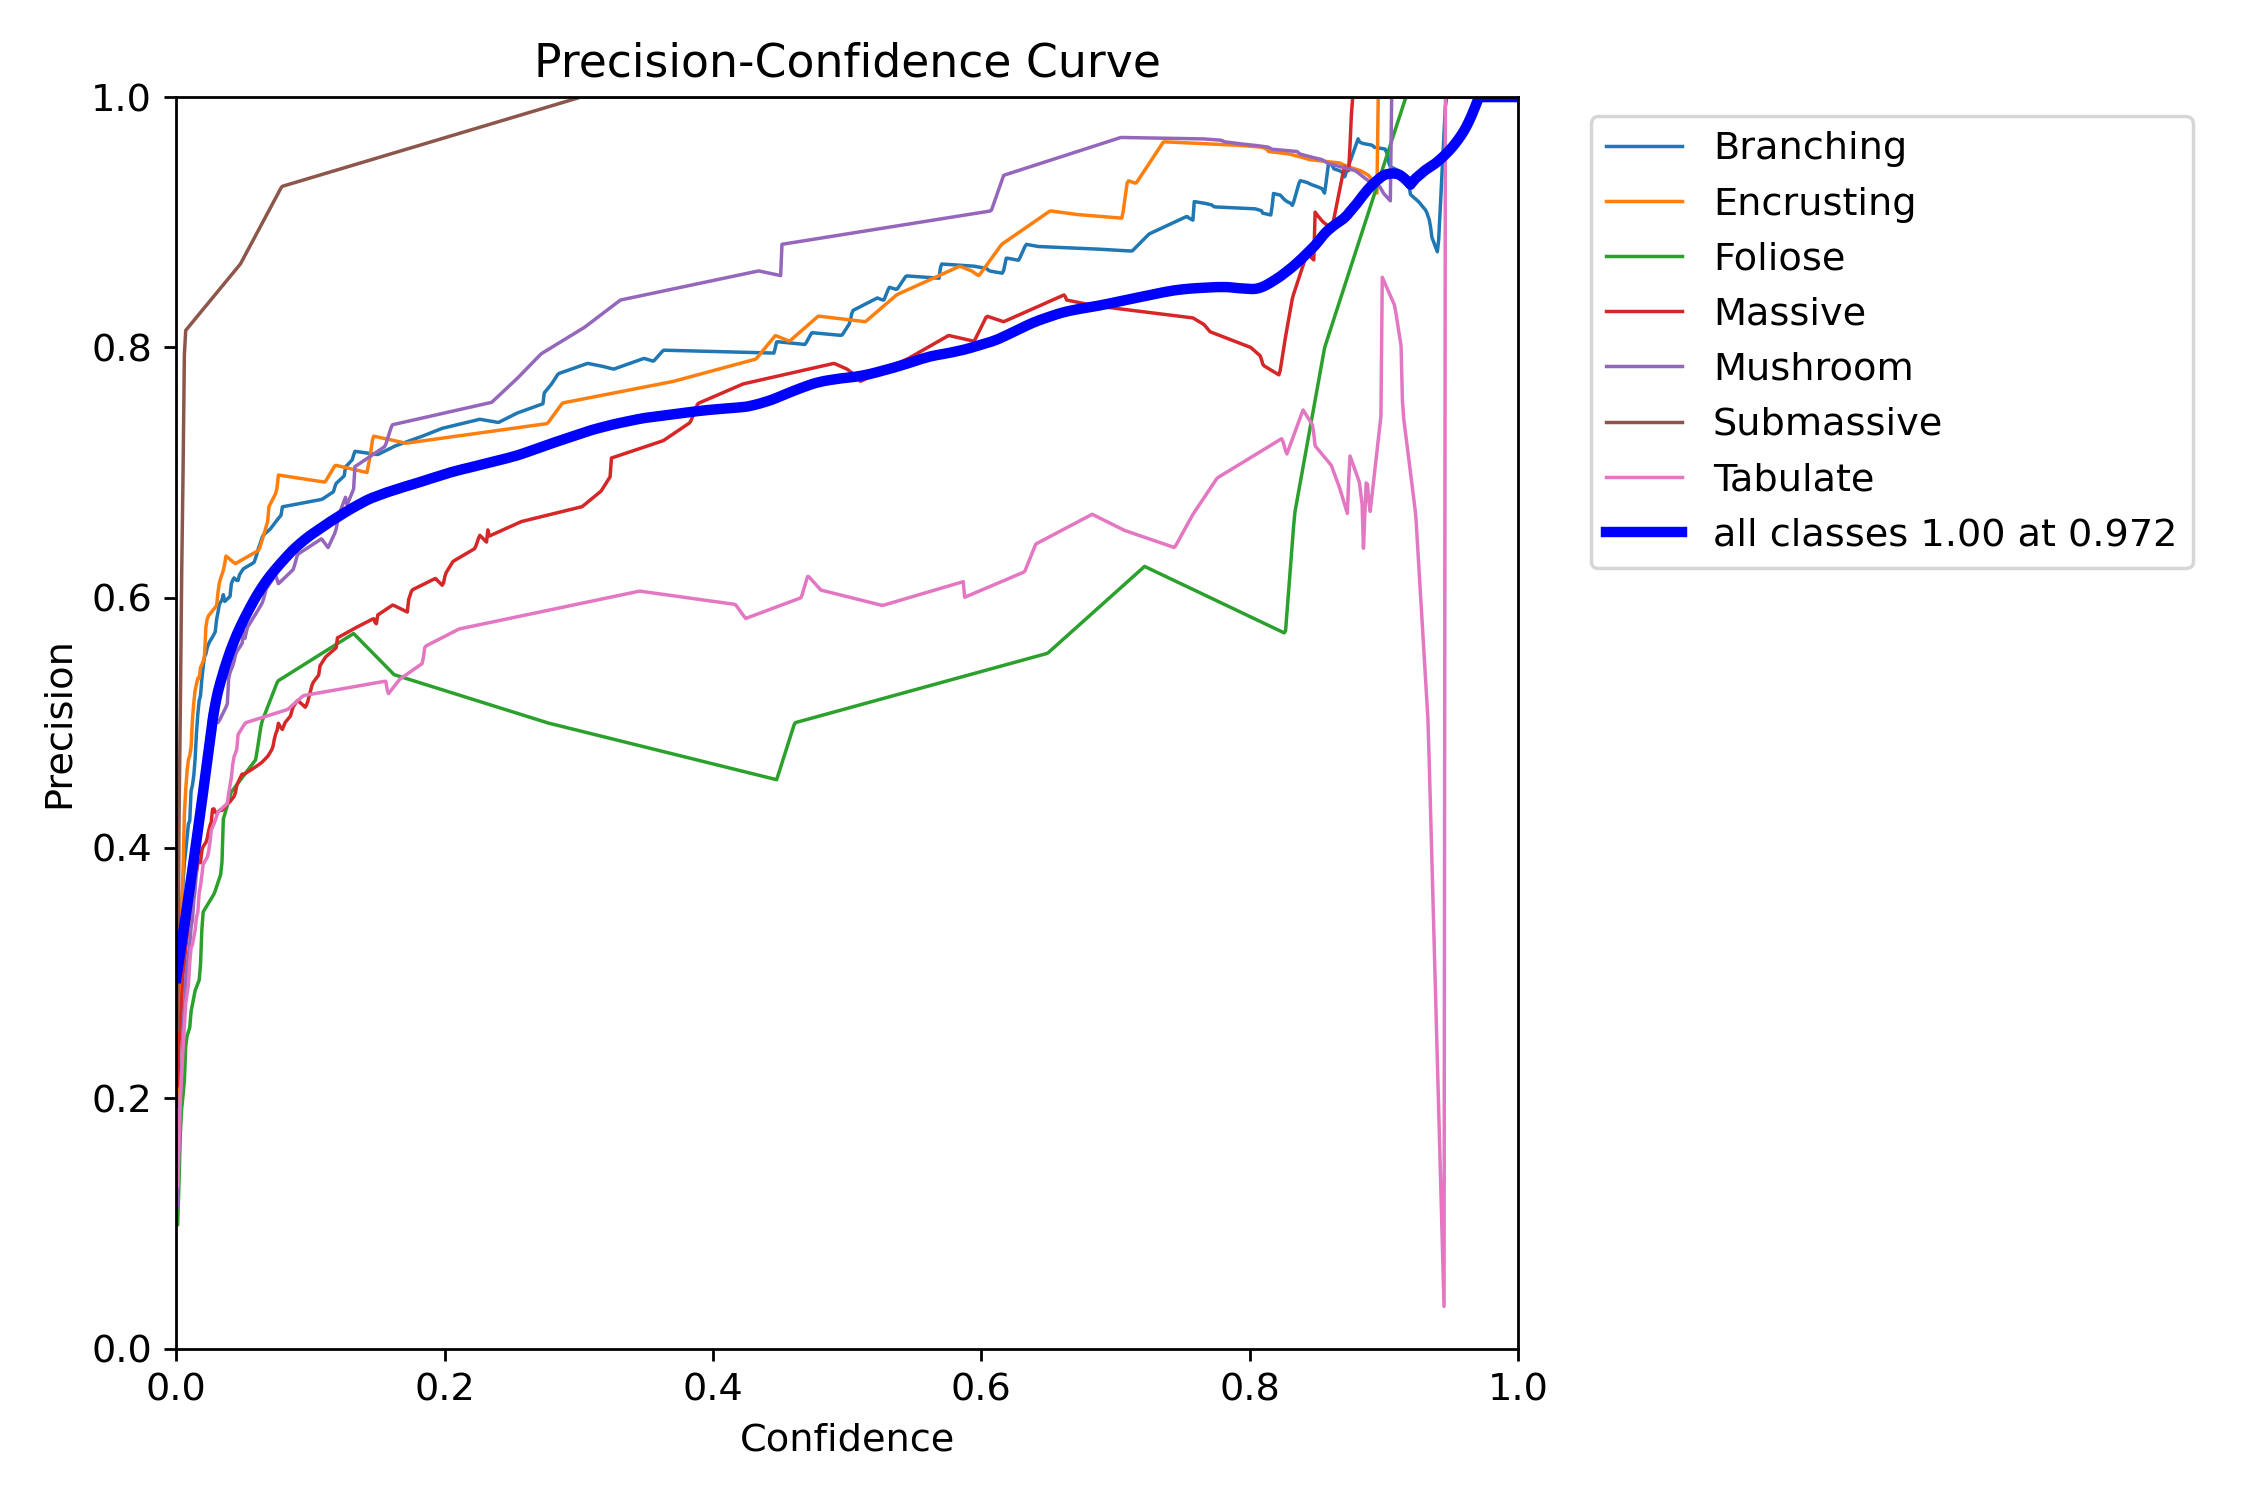

In [25]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

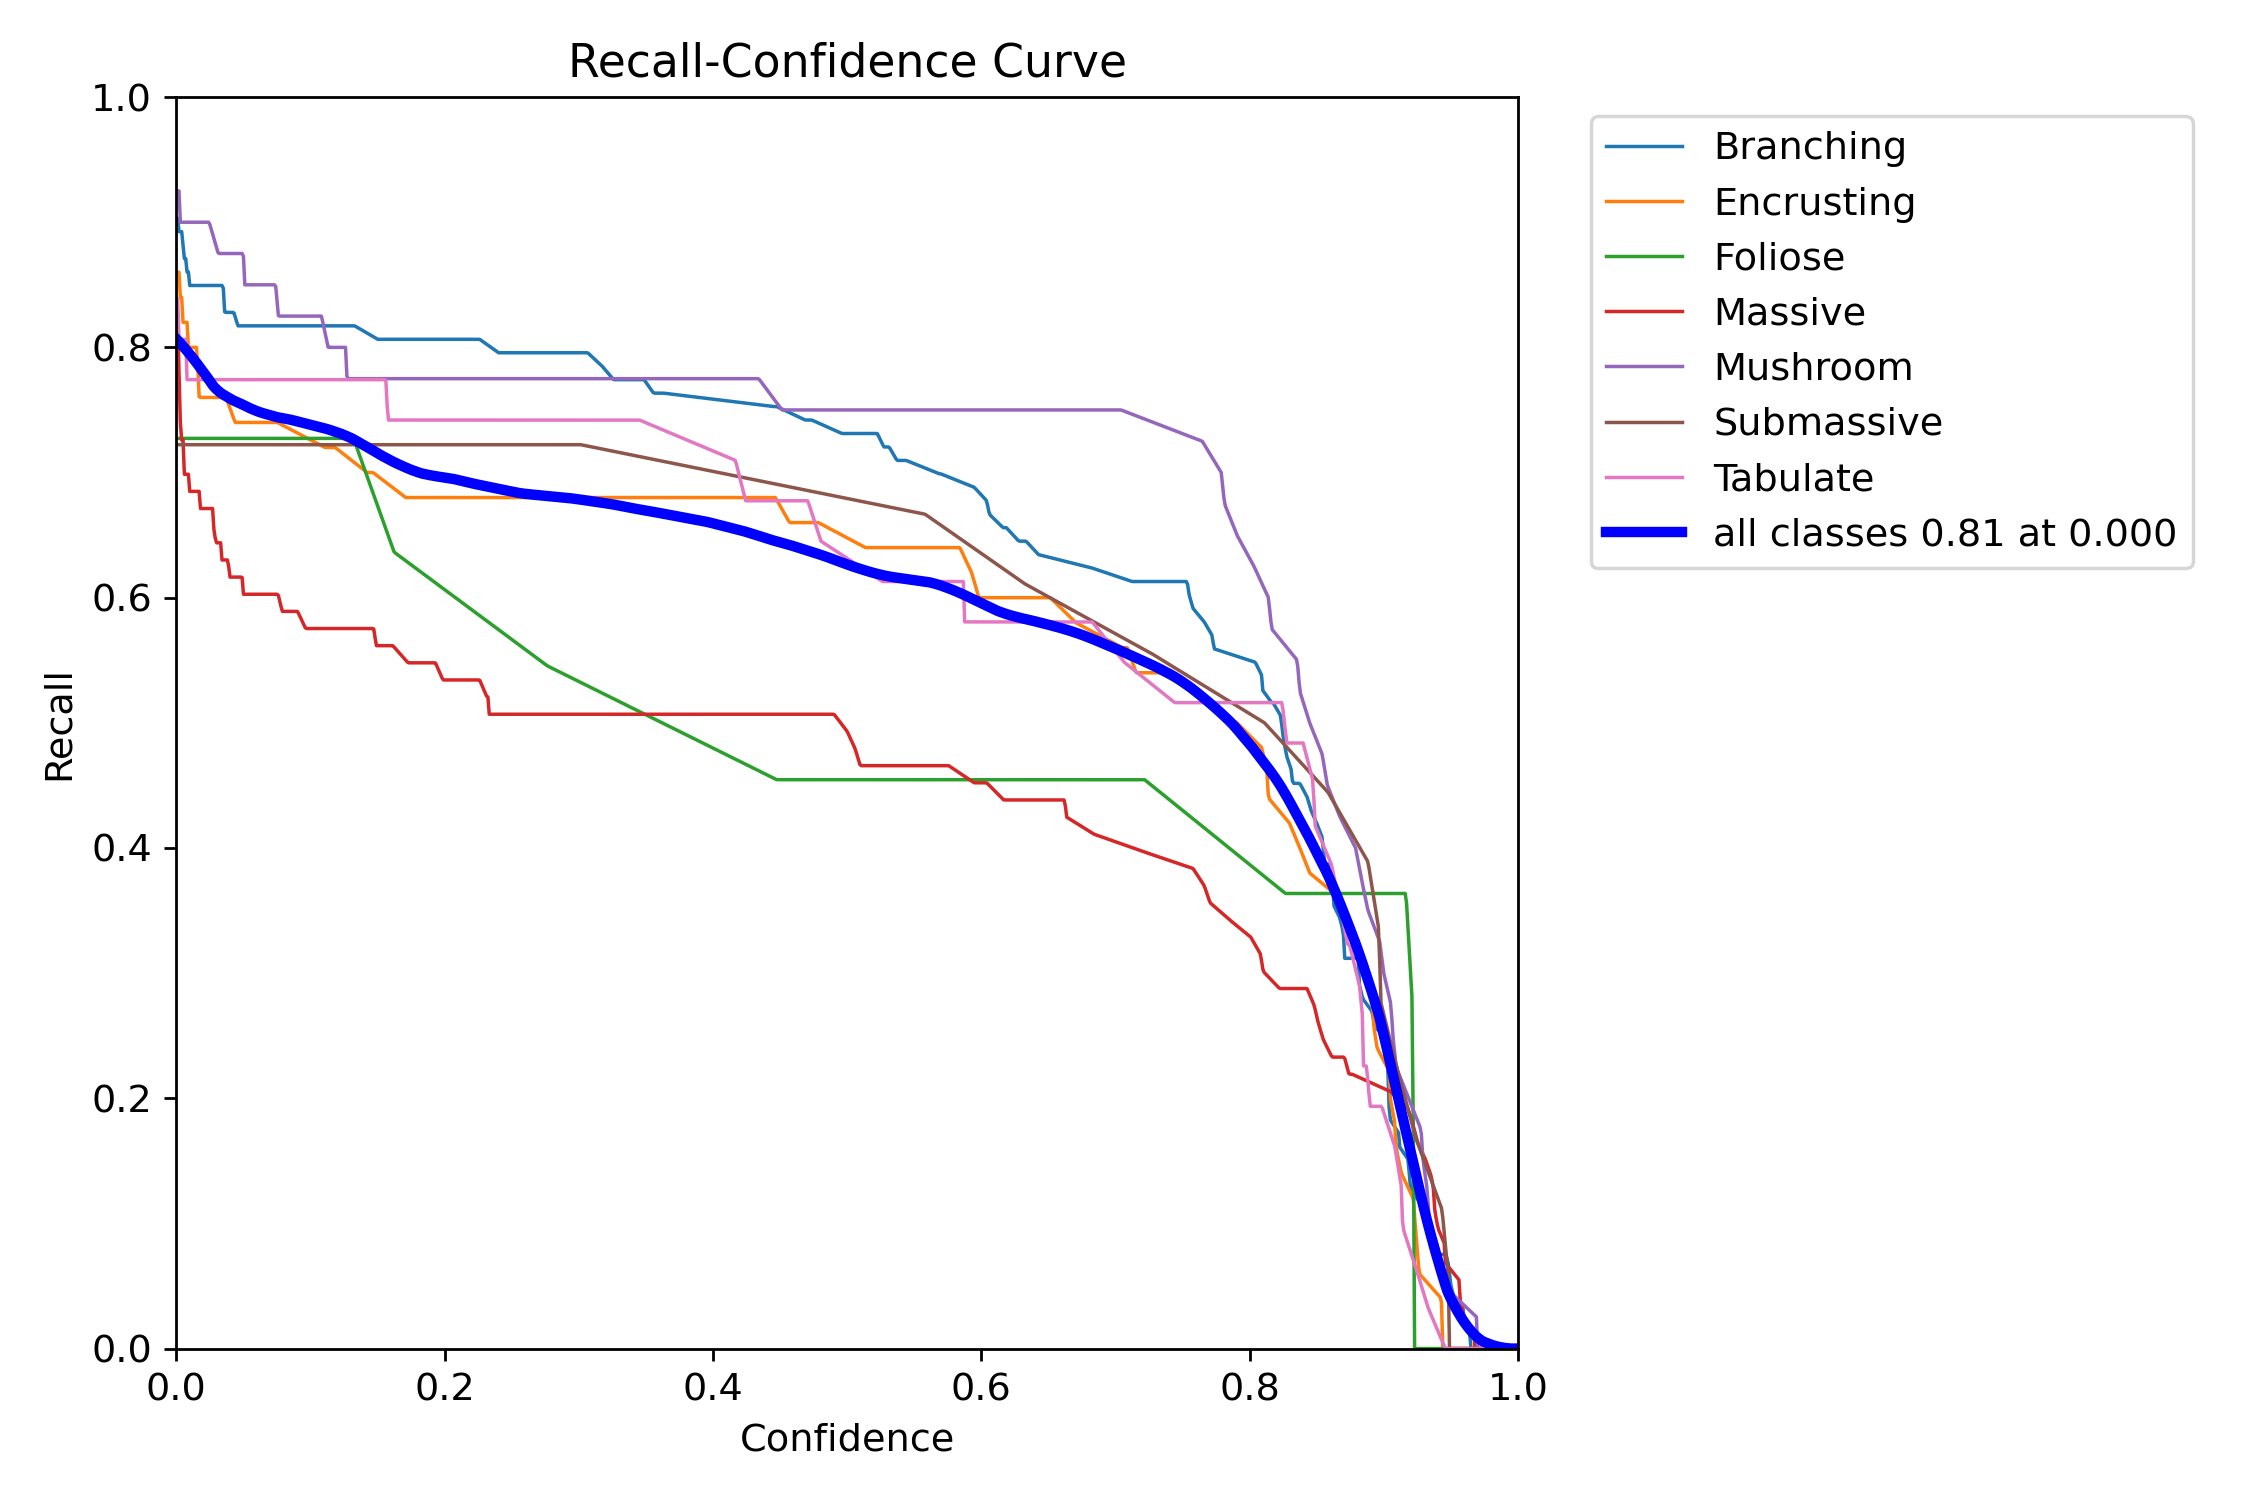

In [26]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

#**Training and Validation Loss**

/content


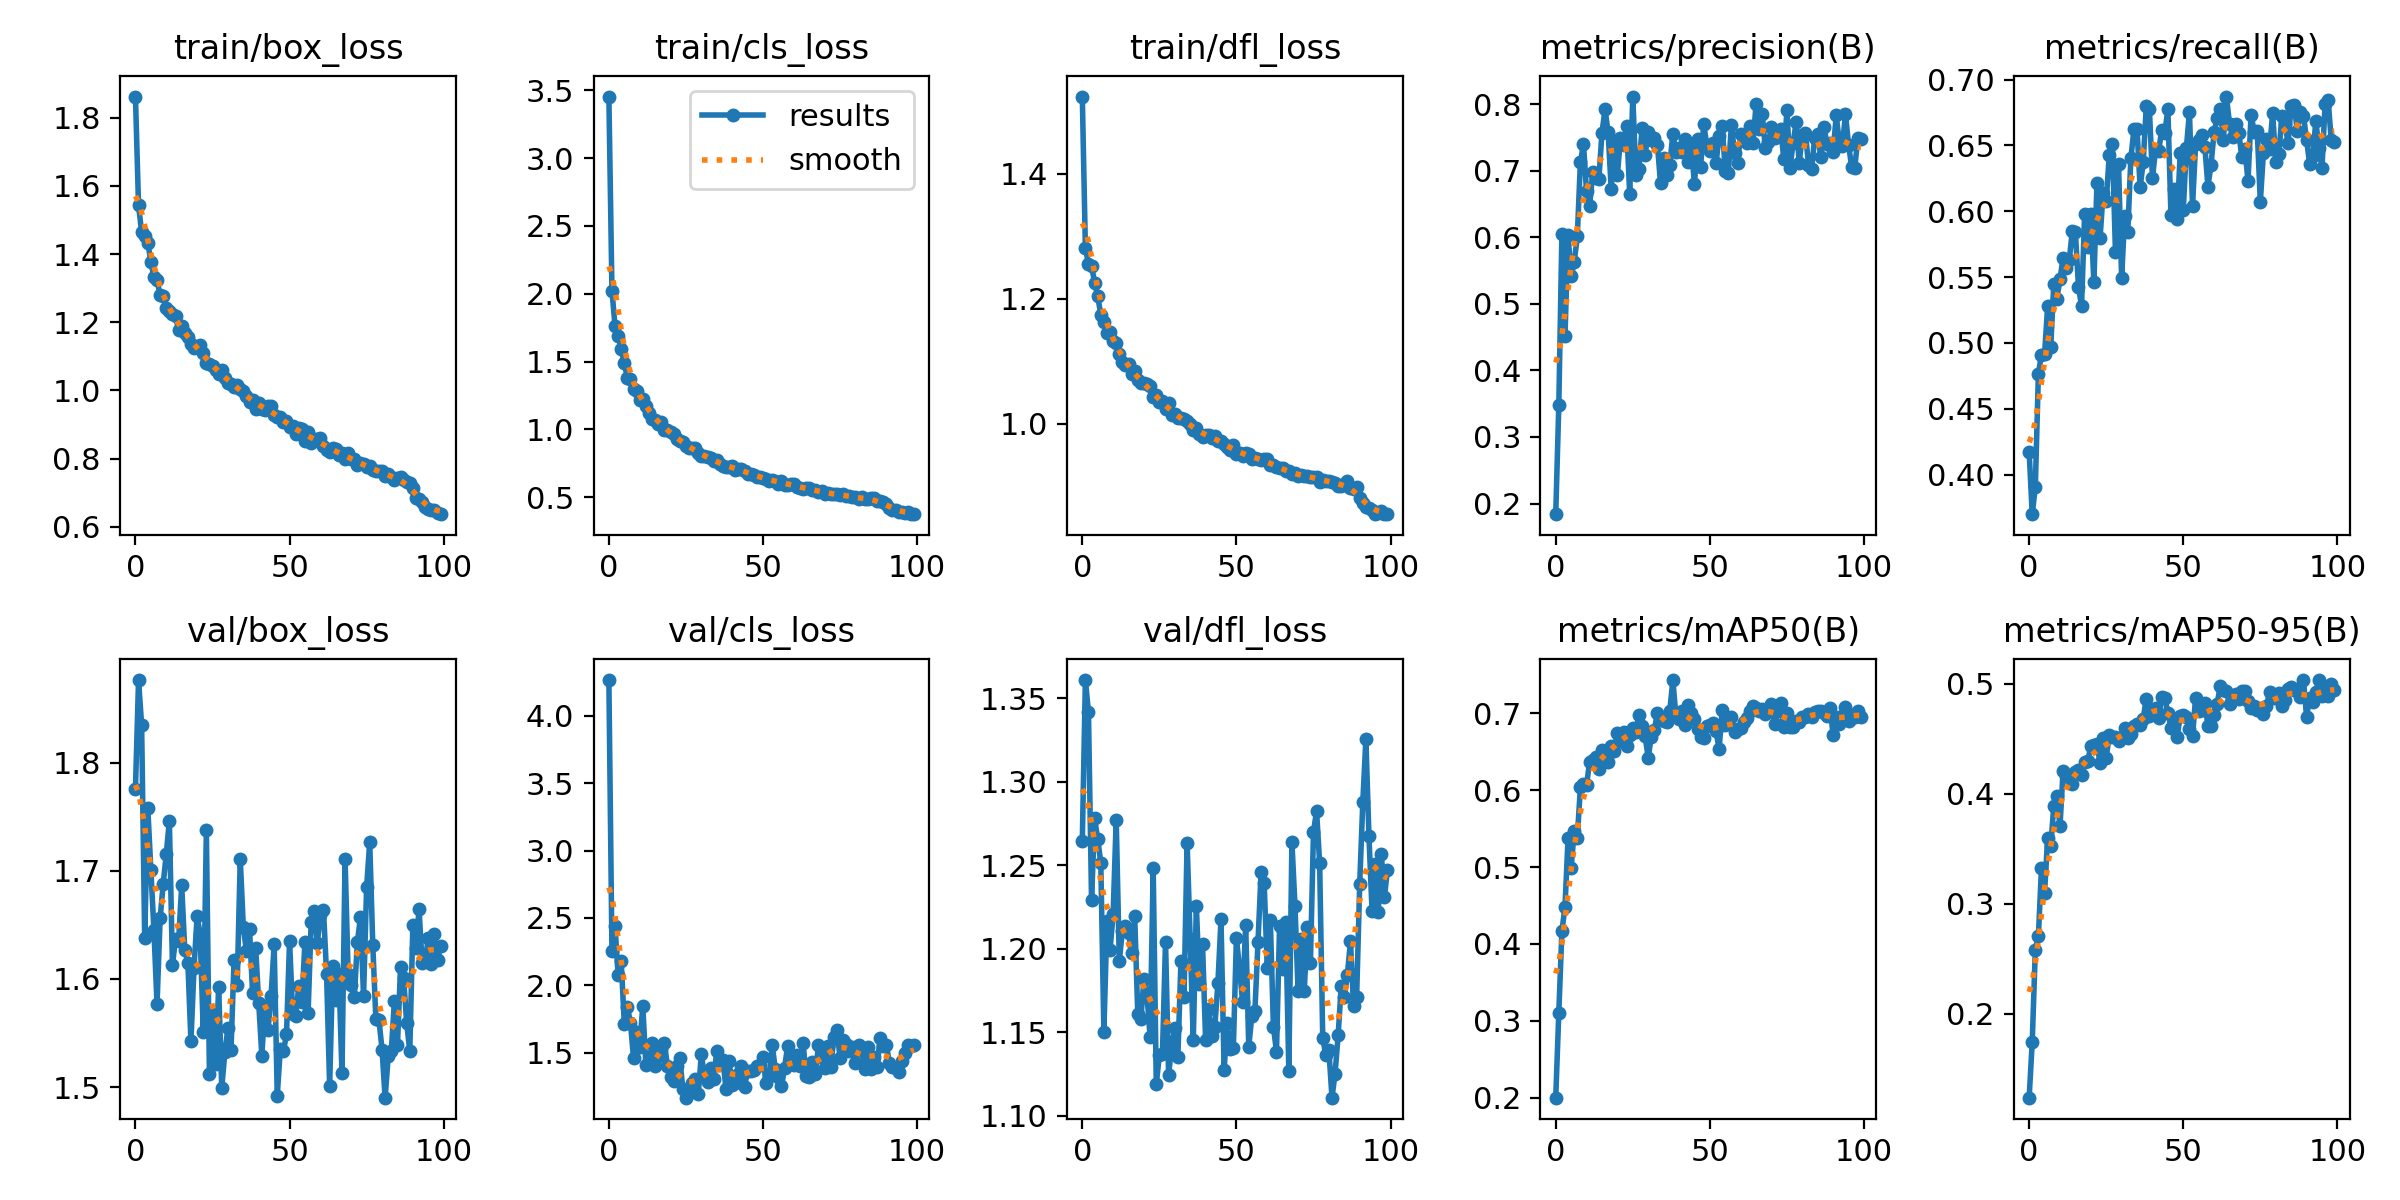

In [27]:
# graph of the training and validation loss
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


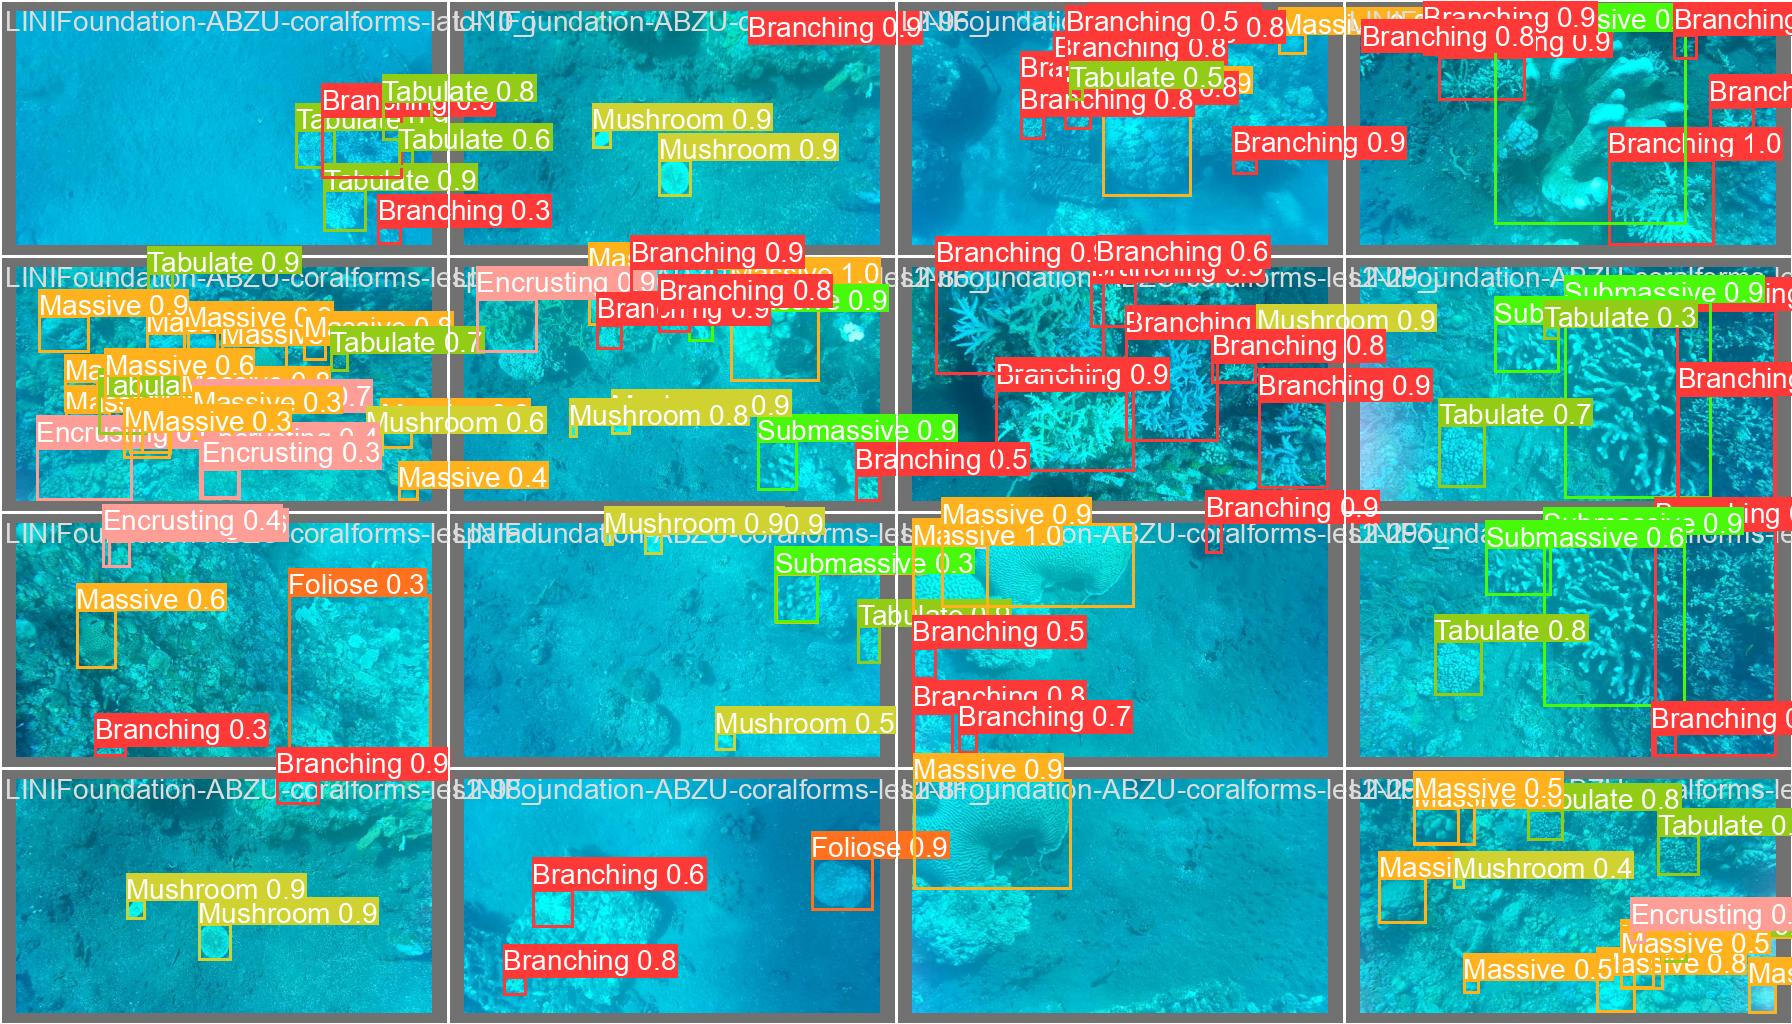

In [28]:
#Model Prediction on validation batch
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


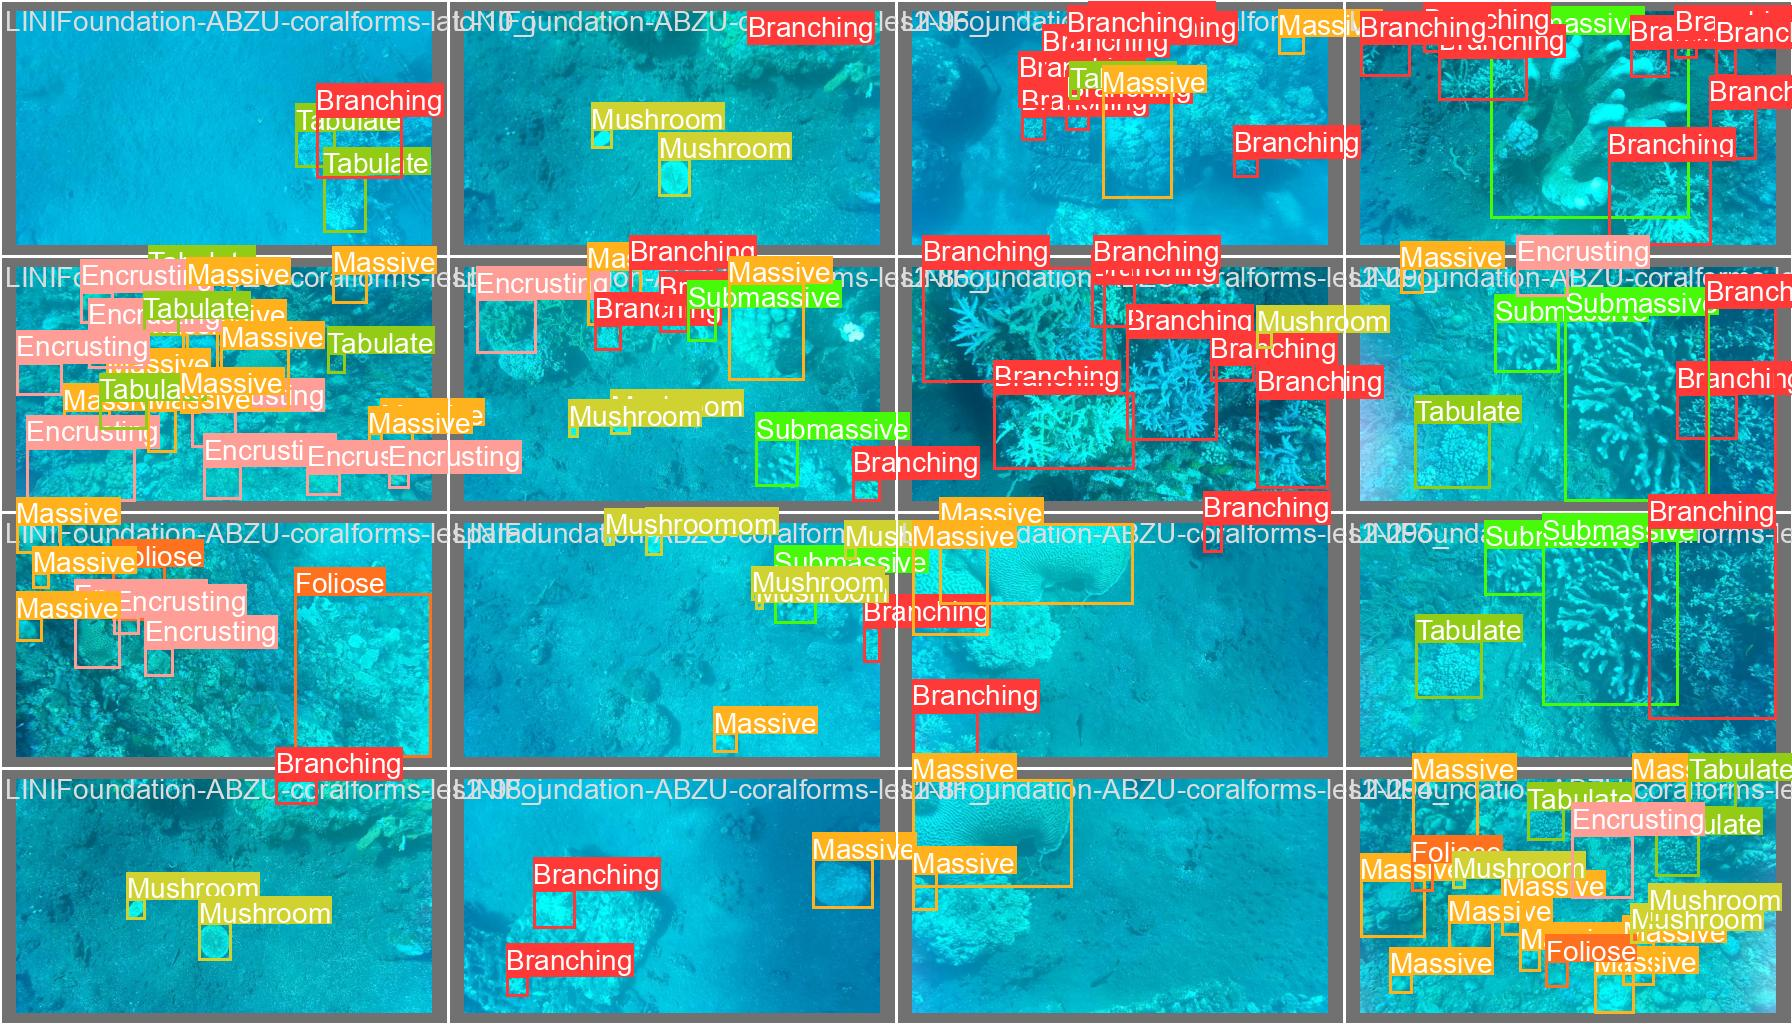

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

#**Validate Custom Model on Test Set**

Testing code for evaluation of testing (because there is no evaluation mode for testing, so i try to change the data.yaml file by replace val data with test data)

In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/Coral-Life-Forms-Detection-3/data-test.yaml

/content
2024-02-08 17:13:12.074409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 17:13:12.074459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 17:13:12.075800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients
val: Scanning /content/datasets/Coral-Life-Forms-Detection-3/test/labels... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<00:00, 1481.66it/s]
val: New cache created: /content/datasets/Coral-L

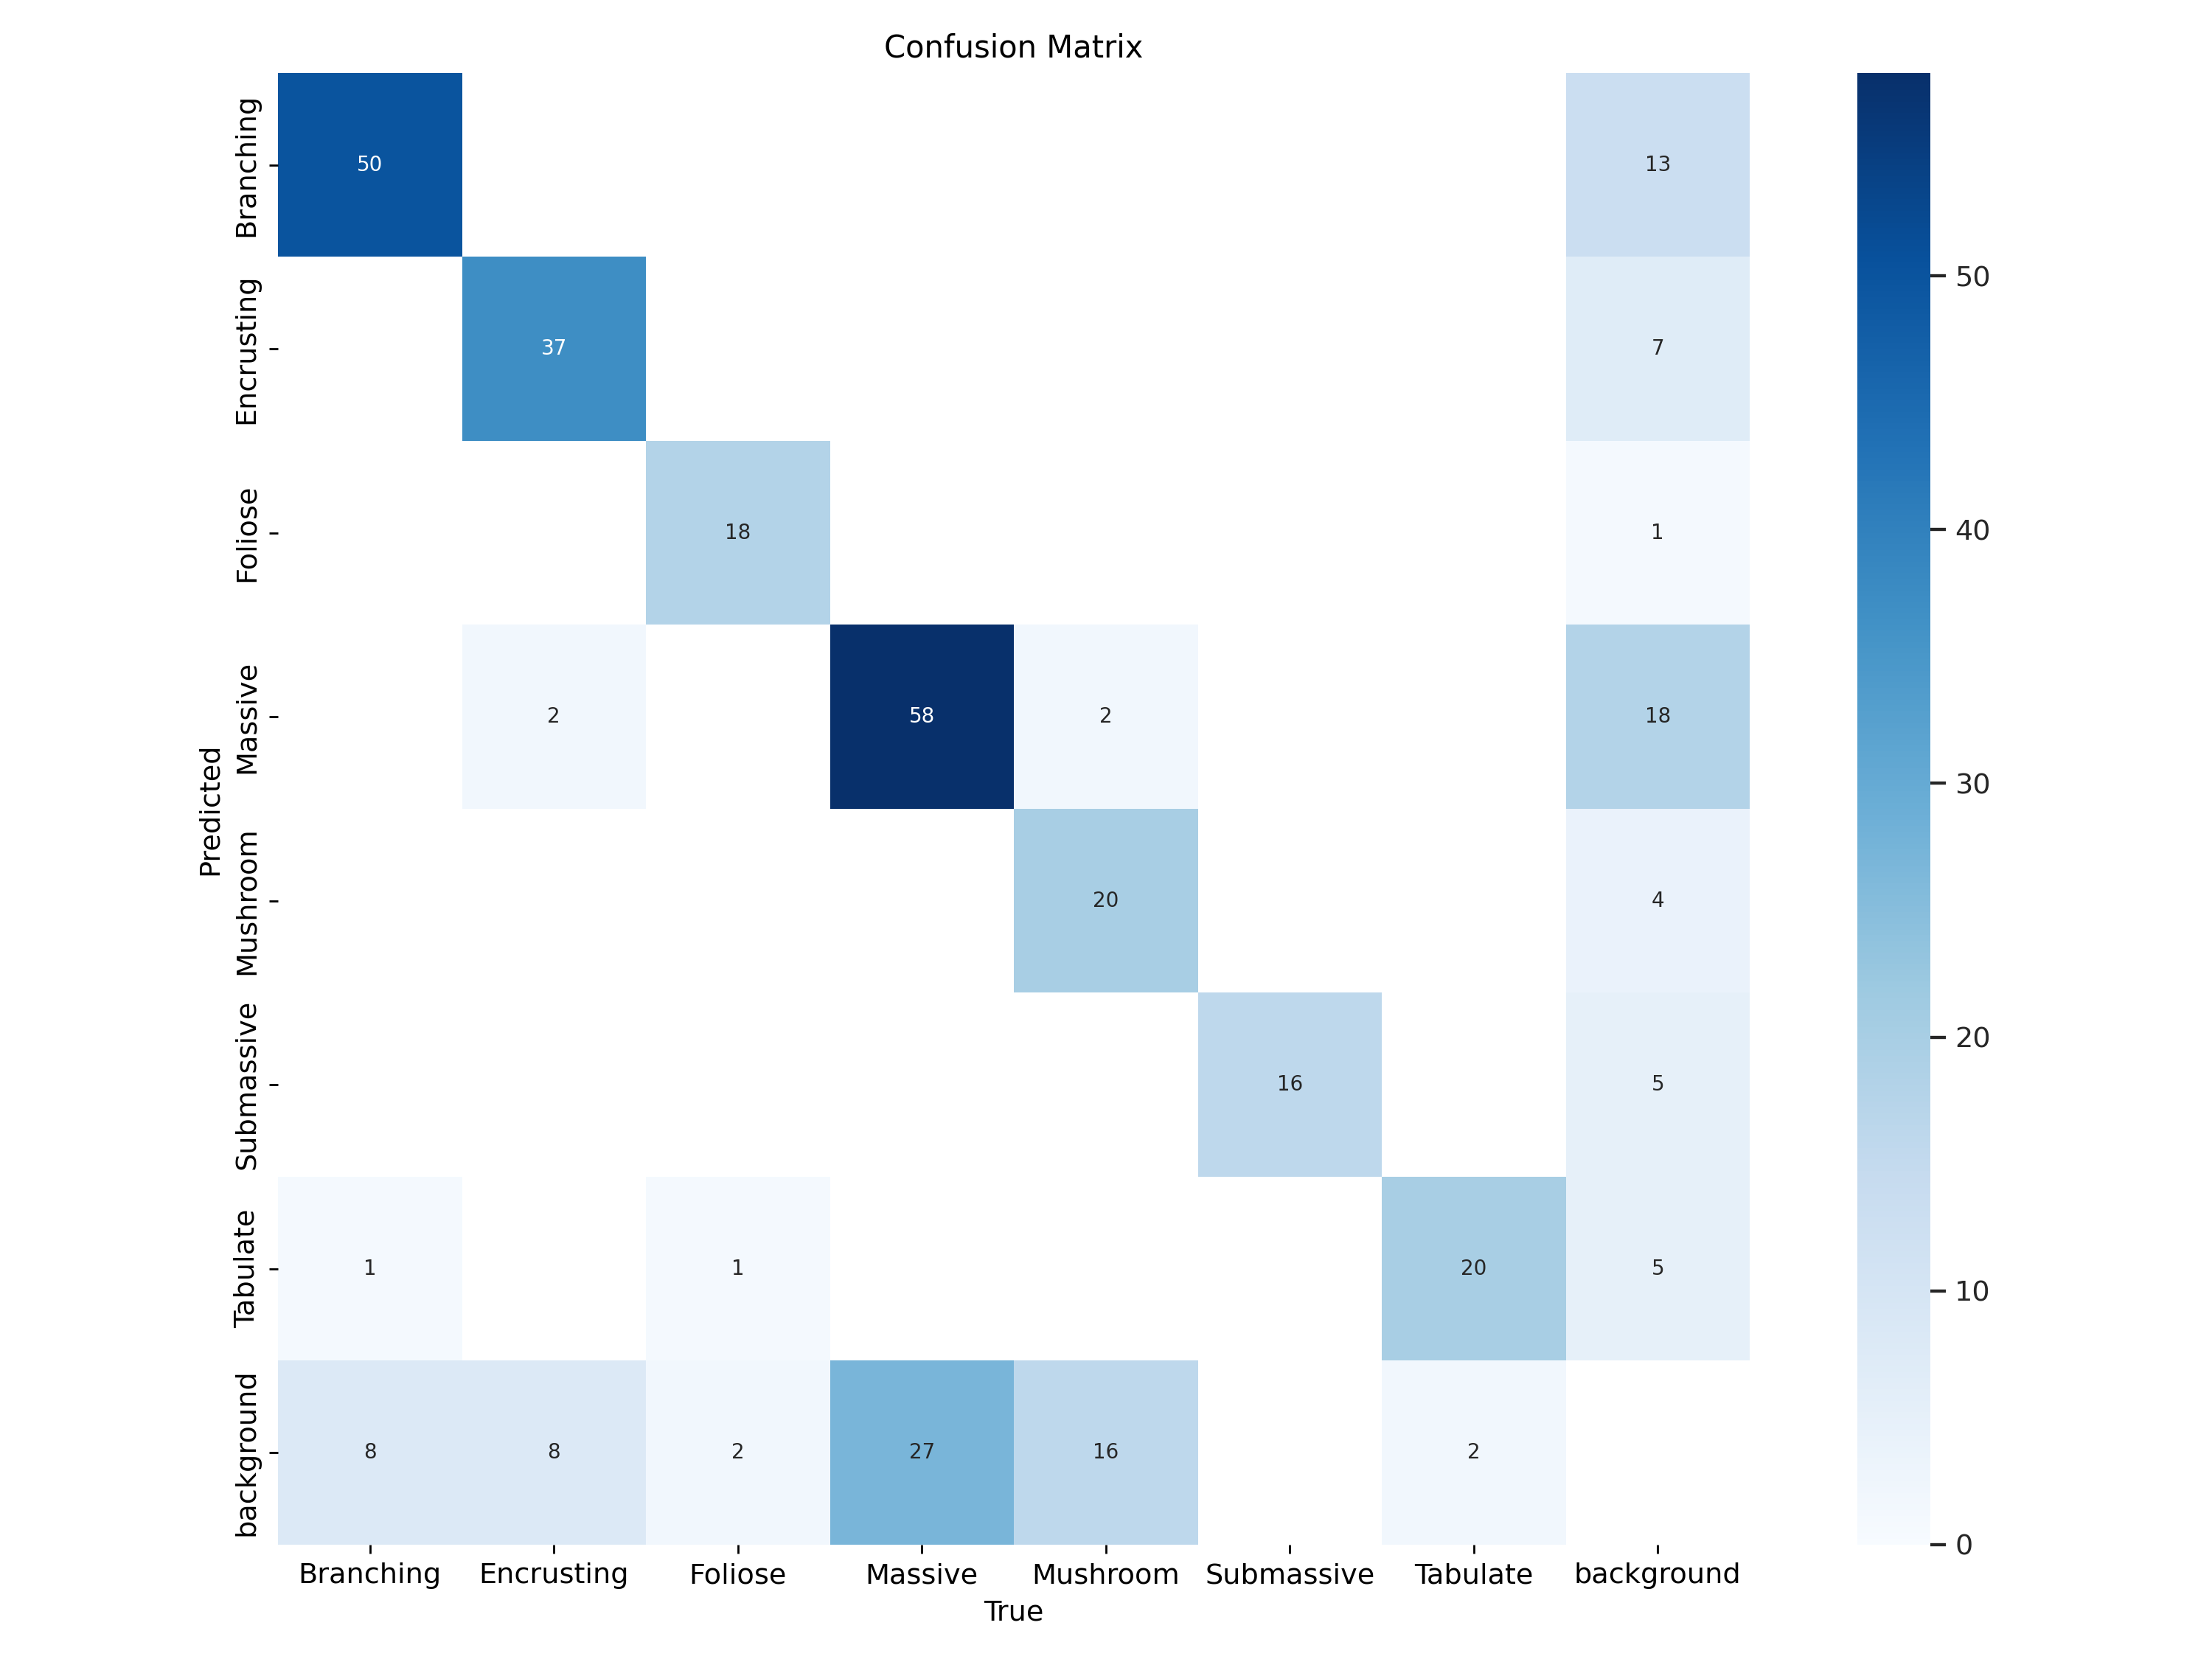

In [31]:
#Confusion matrix is the chart that shows how the model handles different classes

Image(filename='/content/runs/detect/val/confusion_matrix.png', width=900)

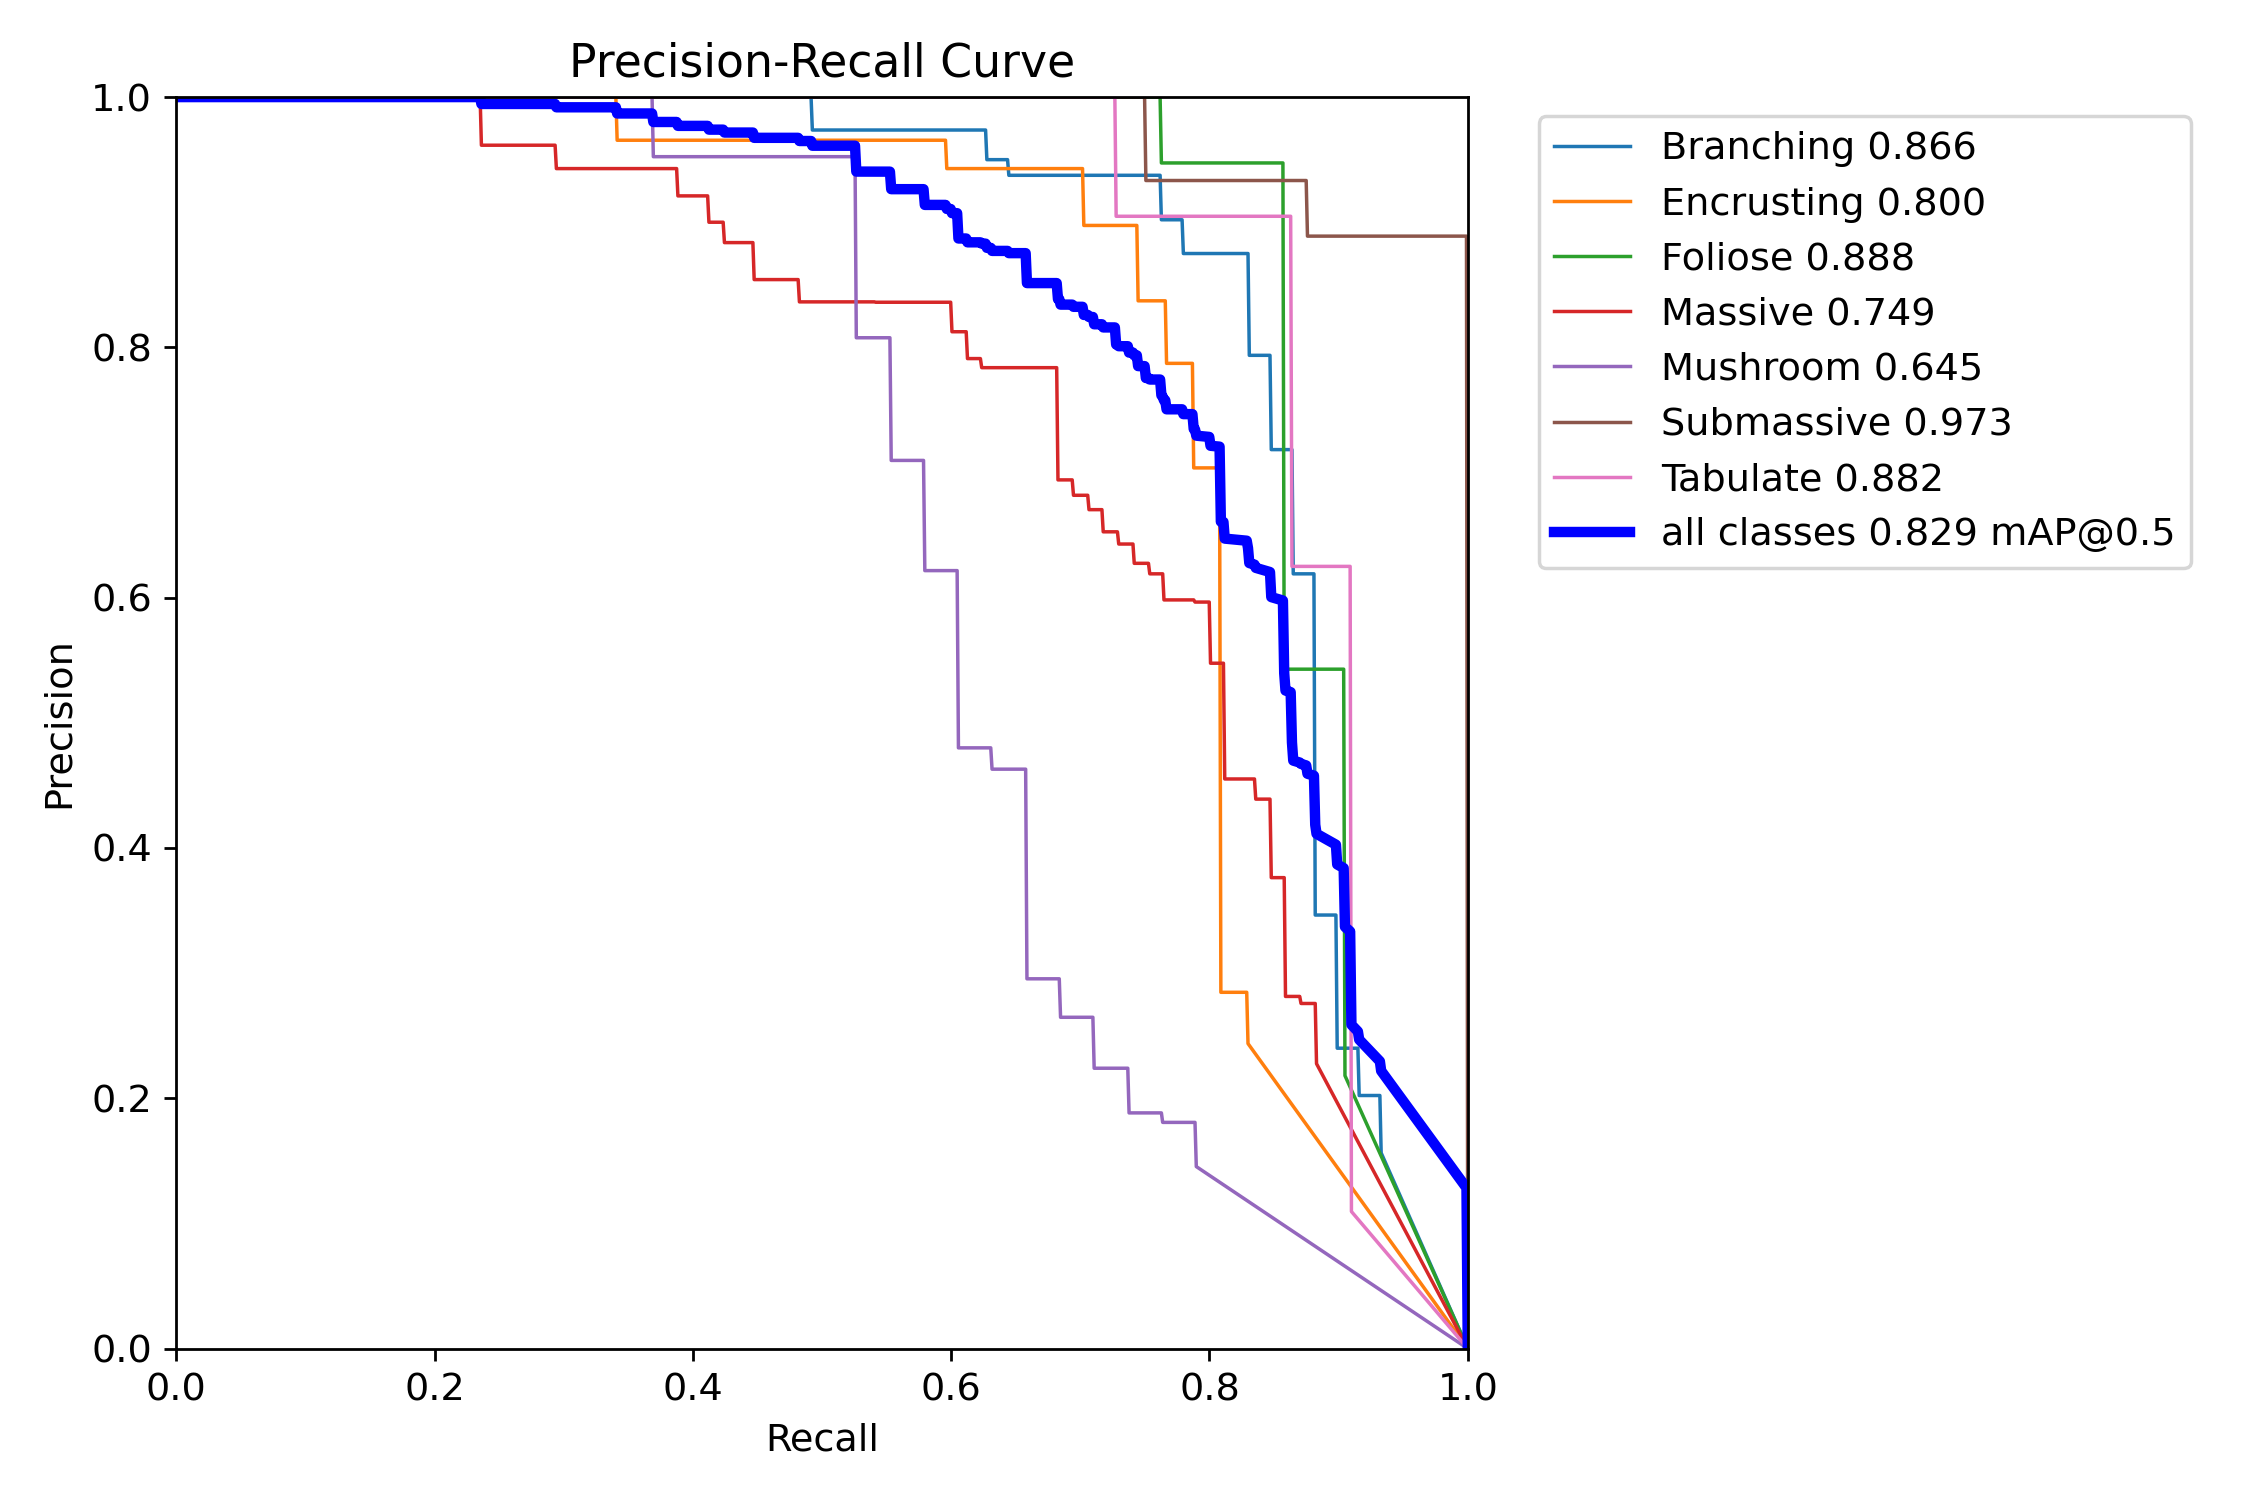

In [32]:
Image(filename='/content/runs/detect/val/PR_curve.png', width=600)

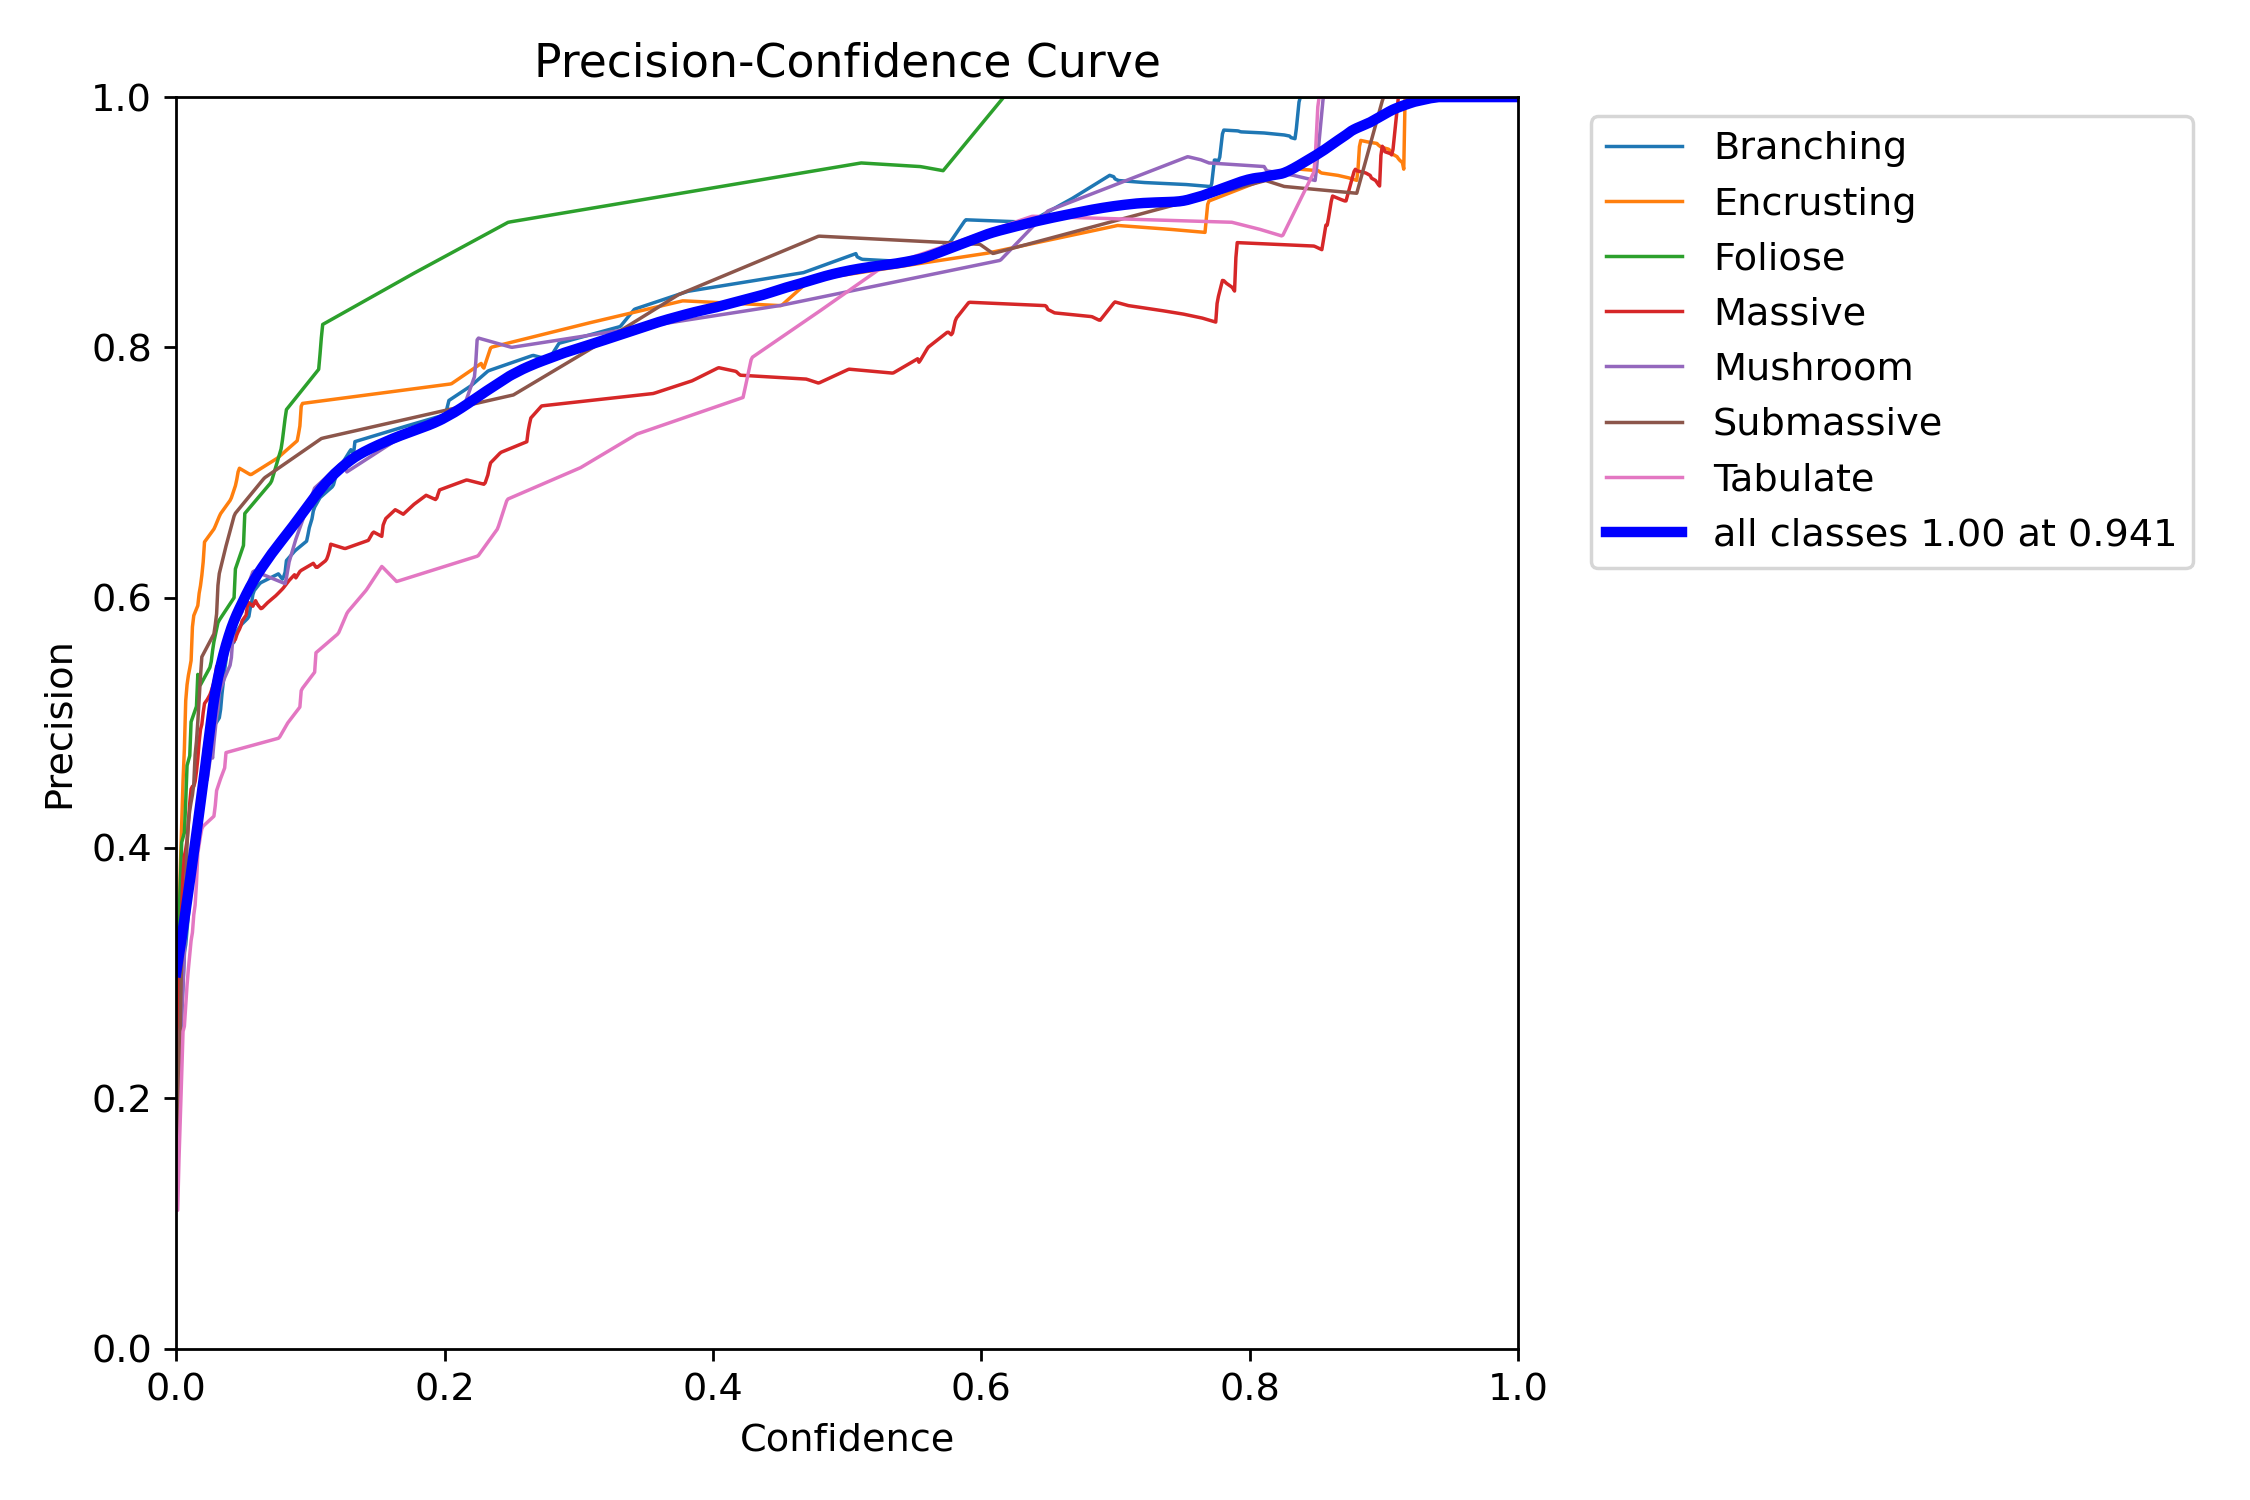

In [33]:
Image(filename='/content/runs/detect/val/P_curve.png', width=600)

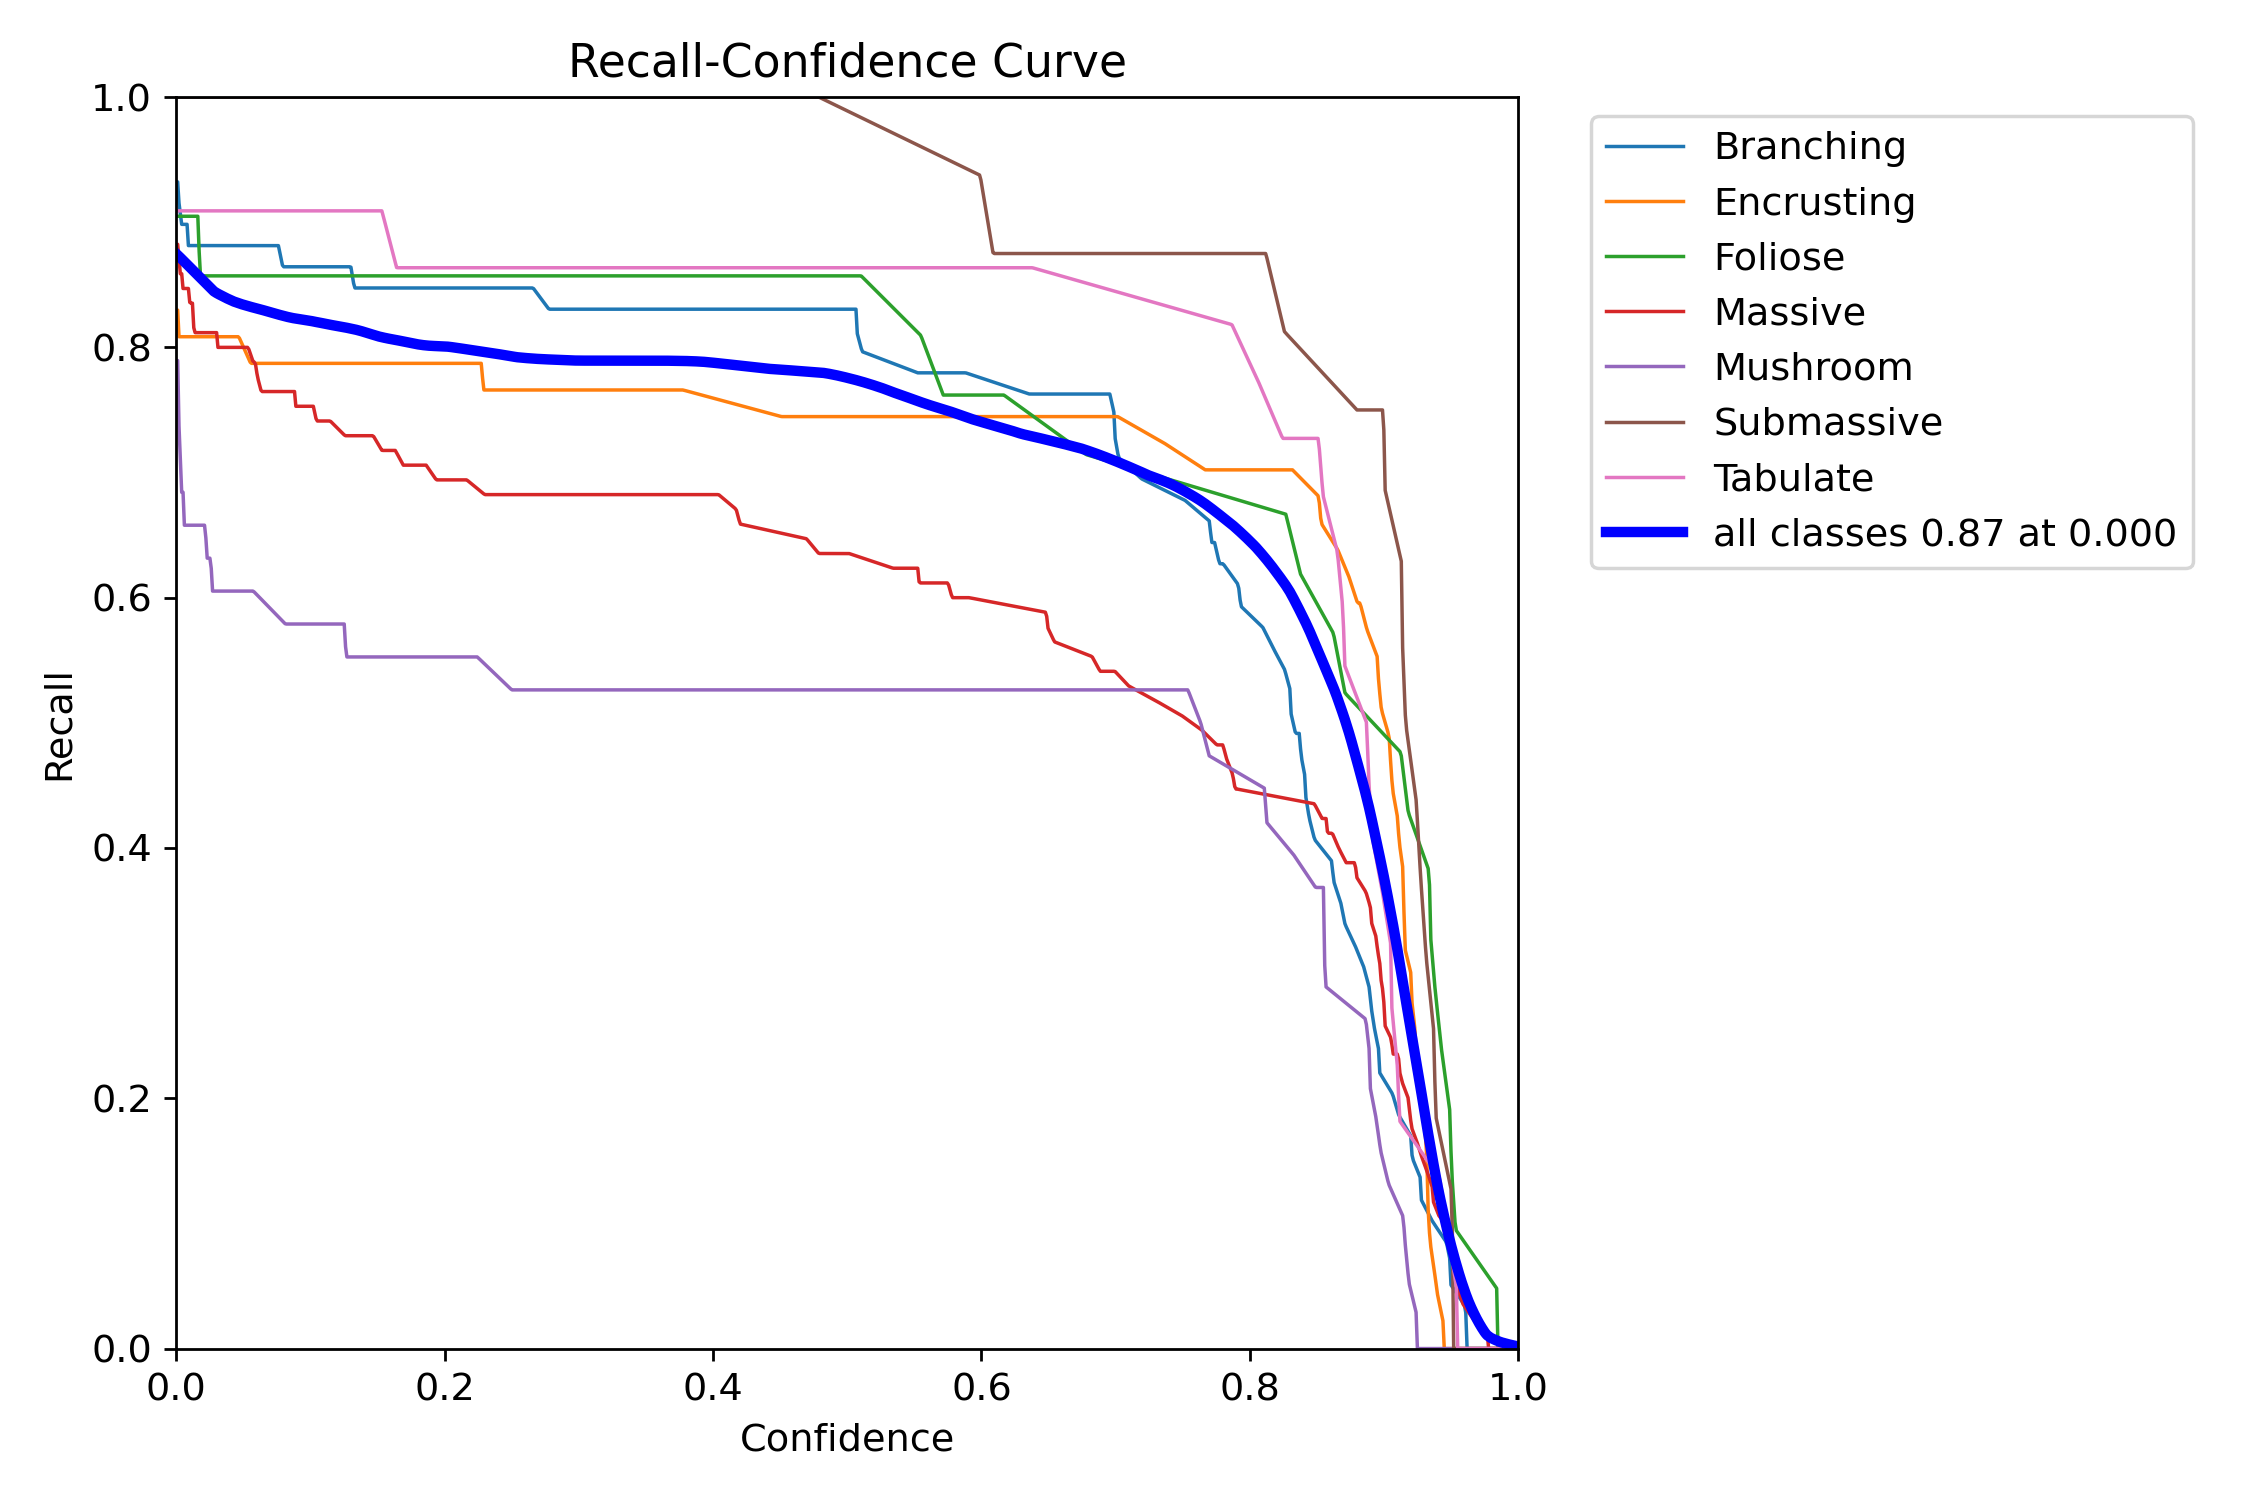

In [34]:
Image(filename='/content/runs/detect/val/R_curve.png', width=600)

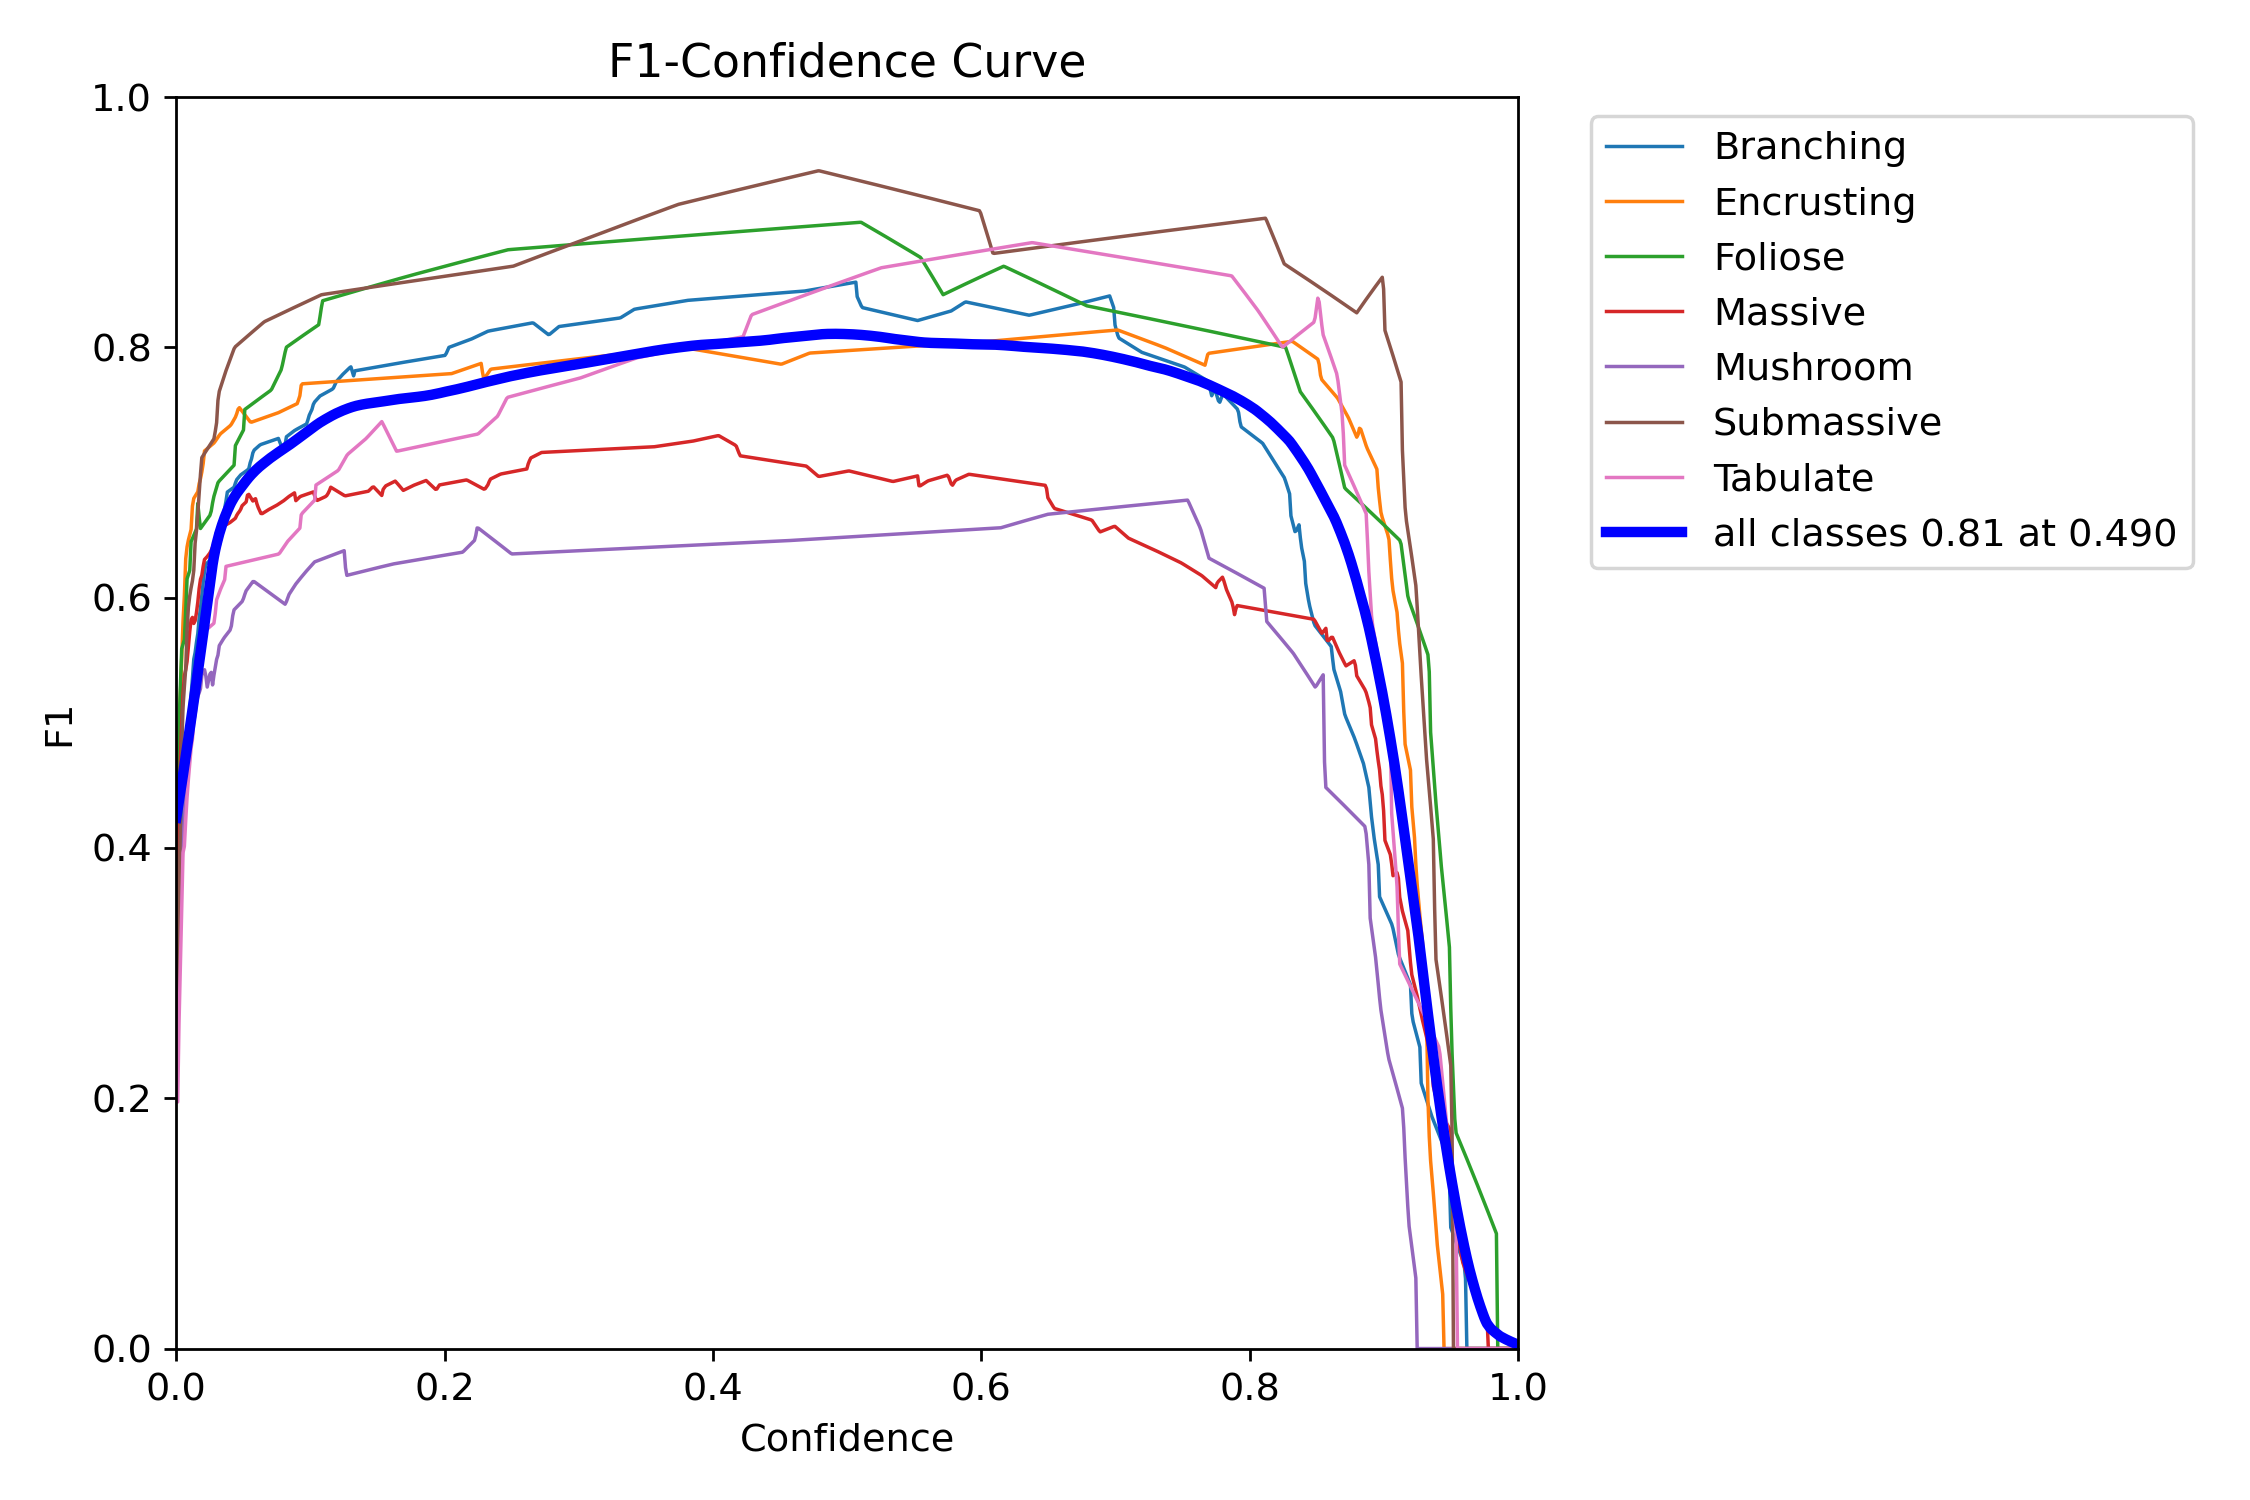

In [35]:
Image(filename='/content/runs/detect/val/F1_curve.png', width=600)

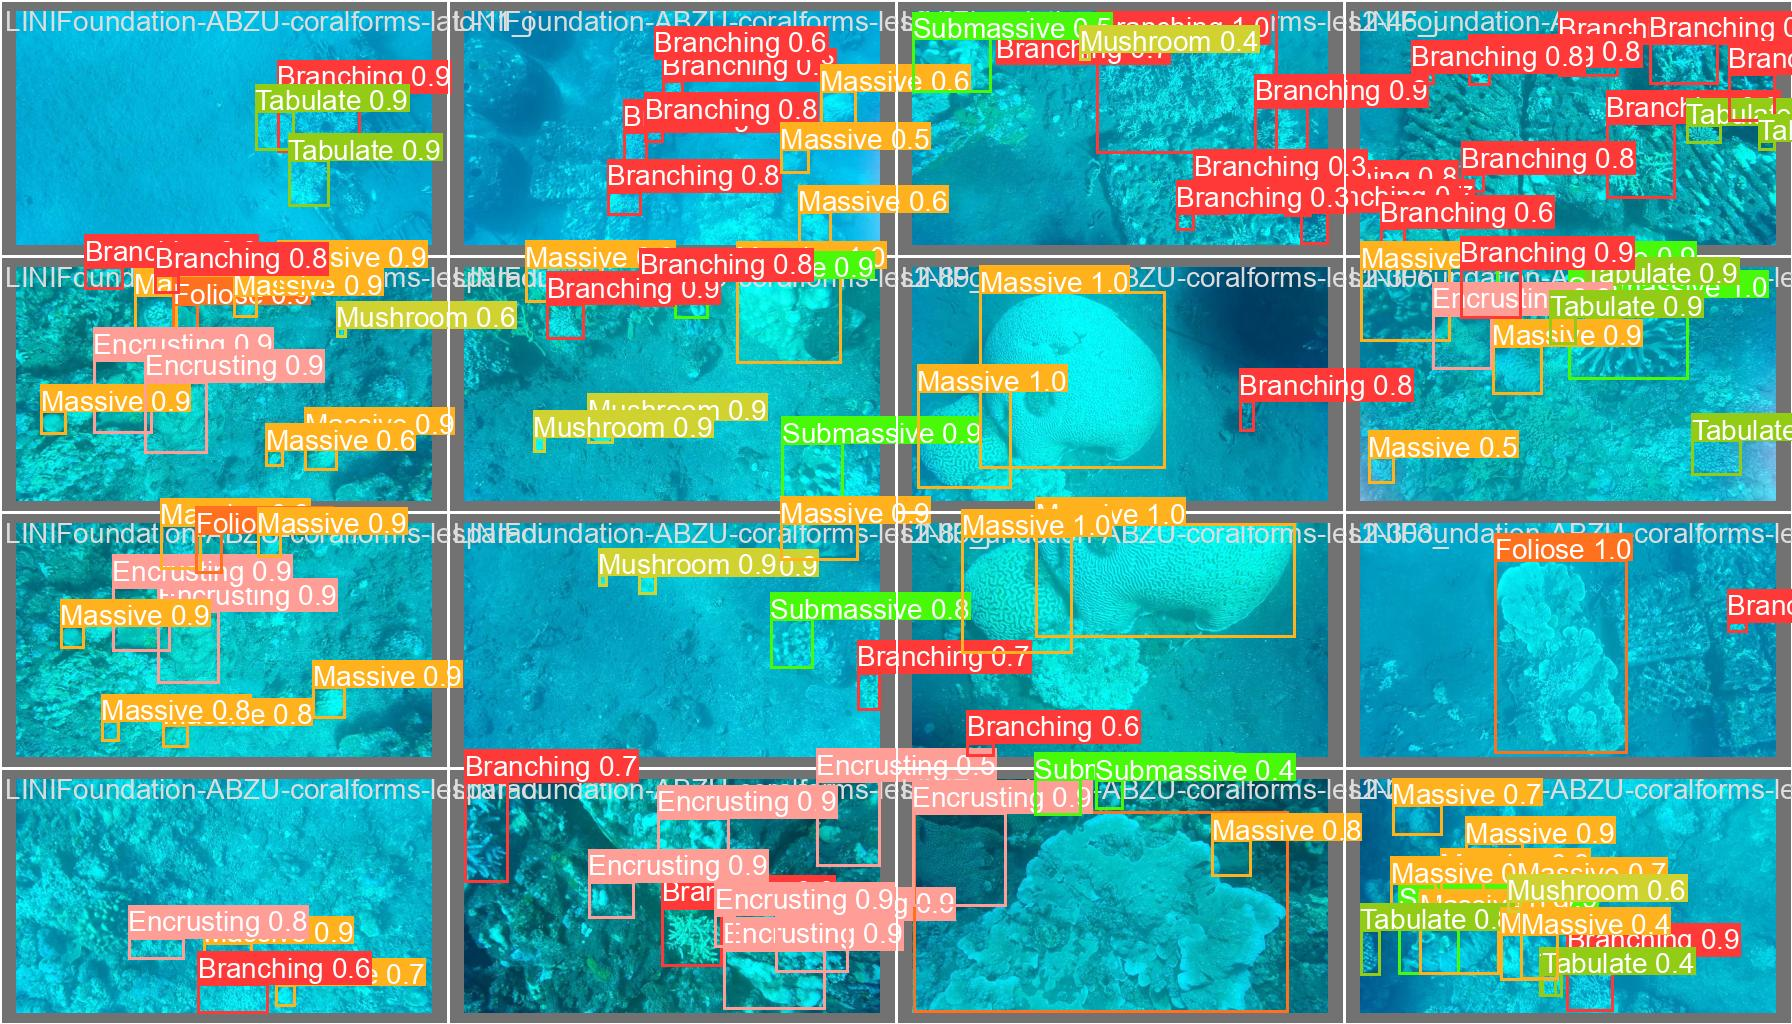

In [36]:
Image(filename='/content/runs/detect/val/val_batch0_pred.jpg', width=600)

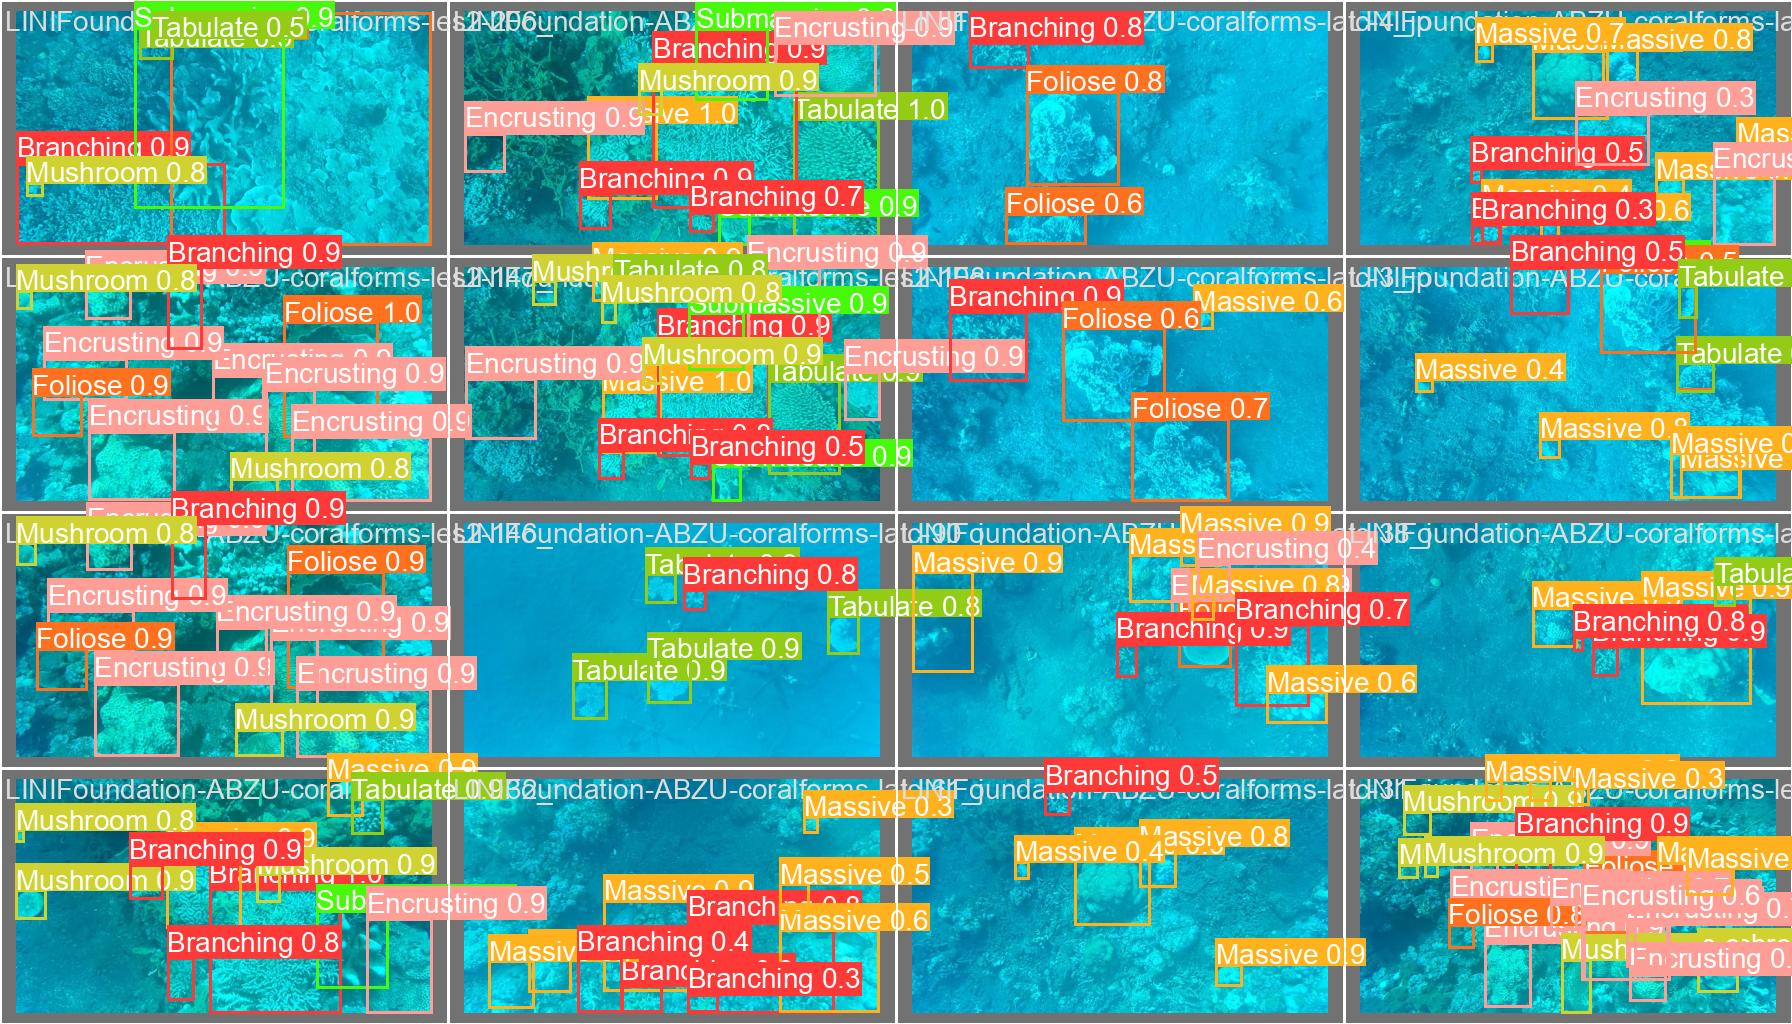

In [37]:
Image(filename='/content/runs/detect/val/val_batch1_pred.jpg', width=600)

#**Inference with Custom Model**

In [38]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Coral-Life-Forms-Detection-3/test/images

/content
2024-02-08 17:13:32.348477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 17:13:32.348550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 17:13:32.350670: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients

image 1/33 /content/datasets/Coral-Life-Forms-Detection-3/test/images/LINIFoundation-ABZU-coralforms-latc-11_jpg.rf.a917bf401fd732b05242c05c6f4d3748.jpg: 256x416 2 Branchings, 2 Tabulates, 113.5ms
im

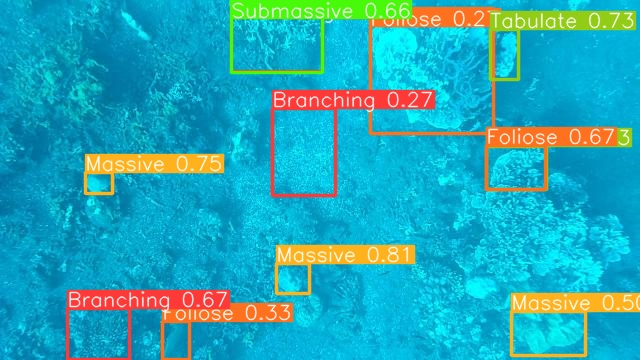

In [39]:
Image("/content/runs/detect/predict/LINIFoundation-ABZU-coralforms-latc-2_jpg.rf.a3c606862103a2f2ed4bfbf4852d4b73.jpg")

#**Testing on a Demo Video**

In [ ]:
#!gdown "link"

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/raw-video.mp4'

/content
2024-01-31 13:24:23.425006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 13:24:23.425056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 13:24:23.426263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/1800) /content/raw-video.mp4: 256x416 1 Massive, 3 Tabulates, 178.9ms
video 1/1 (2/1800) /content/raw-video.mp4: 256x416 1 Massive, 3 Tabulates,

#**Display the Demo Video**

In [ ]:
!ls /content/runs/detect/predict2/

raw-video.avi


In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
from subprocess import run

# Input video path
input_video_path = '/content/runs/detect/predict2/raw-video.avi'

# Output compressed video path
output_video_path = "/content/result_compressed.mp4"

# Compress the video using FFmpeg
run(["ffmpeg", "-i", input_video_path, "-vcodec", "libx264", output_video_path])

print("Video compression complete.")

Video compression complete.


In [ ]:
from IPython.display import HTML

# Display the video
HTML(f'<video controls src="{output_video_path}" width="400"></video>')
